# The Lending Club Case Study
## Objective: 
#### Perform EDA to identify features that correspond to risk customers to minimize credit losses

In [1]:
# Import the required python libraires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set Jupyter Notbook display properties
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 250)

# Step 0: Understand dataset

In [3]:
# import the provided dataset
df = pd.read_csv('loan.csv')

C:\Users\lathr\AppData\Local\Temp\ipykernel_4472\768882172.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan.csv')


In [4]:
# list the attributes and non-null count of the dataset
df.info(verbose=True, show_counts=True)

# The below statistics indicate that there are columns with null values in the given dataset
# some of the columns are consistently null (so can be ignored)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

# Step 0.1 Identify the list of columns with null values

In [5]:
# Remove all the columns that contain null values for all the records
# get all the columns of the dataframe
all_column_list = df.columns

# get all the columns of the dataframe which are null for all the records 
unwanted_column_list = df.isnull().sum()[(df.isnull().sum() == df['id'].count())].index

# placeholder list for clean columns
surviving_column_list = []

for column_name in all_column_list:
    if not (column_name in unwanted_column_list):
        surviving_column_list.append(column_name)

print(surviving_column_list)

# Create a new dataframe from the clean column lists
df = df[surviving_column_list]

df.head(2)


['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens']


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [6]:
len(unwanted_column_list)

54

In [7]:
# Identify the list of attributes containing do not contain null values for all the records
# these are potential candidates for fixing null values
df.isnull().sum()[(df.isnull().sum() > 0) & (df.isnull().sum() != df['id'].count())]

emp_title                      2459
emp_length                     1075
desc                          12942
title                            11
mths_since_last_delinq        25682
mths_since_last_record        36931
revol_util                       50
last_pymnt_d                     71
next_pymnt_d                  38577
last_credit_pull_d                2
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
pub_rec_bankruptcies            697
tax_liens                        39
dtype: int64

# Step 1: Fixing Missing Values

## Step 1.1 Fix the missing values for employment title

In [8]:
df['emp_title'].fillna('Unknown', inplace=True)

C:\Users\lathr\AppData\Local\Temp\ipykernel_4472\4093805493.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['emp_title'].fillna('Unknown', inplace=True)


## Step 1.2 Fix the missing value for employment length

In [9]:
df['emp_length'].fillna('Unknown', inplace=True)

C:\Users\lathr\AppData\Local\Temp\ipykernel_4472\1306322973.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['emp_length'].fillna('Unknown', inplace=True)


## Step 1.3 Fix missing value for desc

In [10]:
df['desc'].head(10)
# Conclusion: The data in the column looks verbose and thus can be potentially ignored for any analysis
df.drop(columns=['desc'], axis = 1, inplace=True)

## Step 1.4 Fix missing value for title

In [11]:
df['title'].fillna('Unknown', inplace=True)

C:\Users\lathr\AppData\Local\Temp\ipykernel_4472\711429477.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['title'].fillna('Unknown', inplace=True)


## Step 1.5 Fix the missing value for mths_since_last_delinq

In [12]:
# Since the attribute months since last deliquency is maintained by the org missing values can be treated as 0
df.fillna({'mths_since_last_delinq':0}, inplace=True)


In [13]:
df['mths_since_last_delinq'].isnull().sum()

0

## Step 1.6 Fix the missing value for mnths_since_last_record

In [14]:
# Since mths_since_last_record is potentially a publicly sourced column we will avoid fixing it 
df['mths_since_last_record'].isna().sum()

36931

## Step 1.7 Fix the missing value for revol_util

In [15]:
df[df['revol_util'].isna()]['revol_bal'].unique()

array([    0, 49238], dtype=int64)

In [16]:
df[df['revol_bal'] == 49238]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
5820,977981,1200792,17625,17625,17625.000000,60 months,23.91%,506.12,G,G4,Fidelity - HRA,2 years,MORTGAGE,400000.0,Verified,Oct-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal debt payments,775xx,TX,16.08,0,Dec-84,0,80.0,NaN,27,0,49238,93.50%,60,f,0.0,0.0,20896.160000,20896.16,8674.89,10541.99,0.0,1679.28,302.2704,Feb-15,506.12,NaN,Aug-15,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
37540,377376,401484,5000,5000,4440.371299,36 months,16.95%,178.14,E,E5,perlmart shoprite,5 years,MORTGAGE,110000.0,Verified,Feb-09,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,mother,088xx,NJ,14.95,4,Dec-89,0,15.0,NaN,5,0,49238,NaN,22,f,0.0,0.0,6412.768458,5655.00,4999.99,1412.77,0.0,0.00,0.0000,Mar-12,182.11,NaN,Feb-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [17]:
# There is a single record where 
# loan_status is fully paid and revol_bal = 49238 and revol_util is blank 
# it can be dropped
df = df[~((df['revol_util'].isna()) & (df['revol_bal'] == 49238))]

In [18]:
df[df['revol_bal'] == 0]['revol_util'].value_counts()

revol_util
0%        866
37.73%      1
69.98%      1
20%         1
17.71%      1
54.22%      1
38.77%      1
4.85%       1
38.60%      1
21.70%      1
49.69%      1
16.02%      1
28.41%      1
24.63%      1
8.58%       1
21.92%      1
44.10%      1
10.08%      1
57.56%      1
18.82%      1
5.79%       1
27.81%      1
7.43%       1
0.04%       1
49.63%      1
5.34%       1
36.94%      1
33.29%      1
26.32%      1
0.05%       1
8.49%       1
10.17%      1
3.40%       1
58.77%      1
66.60%      1
34.89%      1
70.94%      1
1.88%       1
94.46%      1
9.34%       1
11.62%      1
13.56%      1
41.85%      1
32.04%      1
24.66%      1
24.89%      1
4.40%       1
33.14%      1
17.78%      1
46%         1
32.71%      1
62.60%      1
37.63%      1
4.80%       1
8.80%       1
23.11%      1
8.46%       1
0.12%       1
62.31%      1
25.33%      1
5.33%       1
43.61%      1
0.01%       1
26.33%      1
81.31%      1
2.64%       1
0.75%       1
21.72%      1
21.59%      1
39.95%      1
10.90%   

In [19]:
frequenct_value = df[df['revol_bal'] == 0]['revol_util'].mode()[0]

In [20]:
print(frequenct_value)

0%


In [21]:
# Since most of the revol_bal values are zeros when revol_util is not populated
# We find that revol_util is 0% mostly when revol_bal is 0 
# Thus we can use the mode to fill missing values for revol_util

df.fillna({'revol_util':frequenct_value}, inplace=True)

In [22]:
df['revol_util'].isna().sum()

0

## Step 1.8 Fix the missing value for last_pymnt_d

In [23]:
df[df['last_pymnt_d'].isna()]['loan_status'].unique()

# Since all the charged off (defaulted) loans have missing values for last payment date it is acceptable
# We can ignore this column as it would not play a significant role in analysis

array(['Charged Off'], dtype=object)

## Step 1.9 Fix the missing value for next_pymnt_d

In [24]:
df[df['next_pymnt_d'].isna()]['loan_status'].value_counts()
# Since all the charged off (defaulted) loans have missing values for last payment date it is acceptable
# We can ignore this column as it would not pay a significant role in analysis

loan_status
Fully Paid     32949
Charged Off     5627
Name: count, dtype: int64

## Step 1.10 Fix the missing value for last_credit_pull_d

In [25]:
df[(df['last_credit_pull_d'].isna())].head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
26025,575712,740467,5000,5000,5000.0,36 months,11.12%,163.98,B,B3,Unknown,5 years,RENT,96000.0,Not Verified,Sep-10,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,for my toy business,900xx,CA,4.04,0,Oct-97,0,0.0,NaN,4,0,7172,80.60%,9,f,0.0,0.0,3362.960000,3362.96,2553.55,702.45,0.0,106.96,1.34,Jun-12,163.98,NaN,NaN,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
39476,186499,186347,1000,1000,875.0,36 months,7.12%,30.94,A,A1,Unknown,< 1 year,MORTGAGE,120000.0,Not Verified,Dec-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,Research On Global Warming,941xx,CA,0.65,0,Jul-97,1,0.0,0.0,7,0,2227,3.80%,37,f,0.0,0.0,1110.813028,971.96,1000.00,110.81,0.0,0.00,0.00,Aug-10,185.80,NaN,NaN,0.0,1,INDIVIDUAL,0,0.0,0,NaN,0.0


In [26]:
df[(df['last_credit_pull_d'].isna()) & (df['loan_status'] == 'Fully Paid')]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
39476,186499,186347,1000,1000,875.0,36 months,7.12%,30.94,A,A1,Unknown,< 1 year,MORTGAGE,120000.0,Not Verified,Dec-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,Research On Global Warming,941xx,CA,0.65,0,Jul-97,1,0.0,0.0,7,0,2227,3.80%,37,f,0.0,0.0,1110.813028,971.96,1000.0,110.81,0.0,0.0,0.0,Aug-10,185.8,NaN,NaN,0.0,1,INDIVIDUAL,0,0.0,0,NaN,0.0


In [27]:
# We can remove the record where the loan status is 'Fully Paid' and 'last_credit_pull_d' is missing
# This will help to preserve the record where loan status is charged off
df = df[~ ( (df['last_credit_pull_d'].isna()) & (df['loan_status'] == 'Fully Paid') ) ]

## Step 1.11 Drop attribute collections_12_mths_ex_med

In [28]:
df['collections_12_mths_ex_med'].unique()

array([ 0., nan])

In [29]:
# Since collections_12_mths_ex_med contains all zeros or nans it can be discarded
df.drop(columns=['collections_12_mths_ex_med'], inplace=True) 

## Step 1.12 Drop attribute chargeoff_within_12_mths

In [30]:
df['chargeoff_within_12_mths'].unique()

array([ 0., nan])

In [31]:
# Since collections_12_mths_ex_med contains all zeros or nans it can be discarded
df.drop(columns=['chargeoff_within_12_mths'], inplace=True) 

## Step 1.13 Fix the attribute pub_rec_bankruptcies

In [32]:
df['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    37338
1.0     1674
2.0        7
Name: count, dtype: int64

In [33]:
df[(df['pub_rec_bankruptcies'].isna()) & (df['loan_status'] == 'Charged Off')].head(2)
# Most likely since this is an attribute obtained from external public datasets we can ignore to fix it

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
35362,65426,232106,4000,4000,3892.258856,36 months,11.14%,131.22,B,B1,"Infotrieve, Inc.",< 1 year,MORTGAGE,60000.0,Not Verified,Aug-09,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,djp,481xx,MI,11.08,0,Aug-95,0,0.0,0.0,14,0,24220,68.60%,33,f,0.0,0.0,2755.20,2615.80,2170.35,584.85,0.0,0.0,0.0,Jun-11,131.22,NaN,May-16,1,INDIVIDUAL,0,0,NaN,0.0
39019,280776,280764,19200,19200,5100.006009,36 months,12.29%,640.38,C,C5,Self-employed,10+ years,RENT,53000.0,Not Verified,Mar-08,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,consolidation,606xx,IL,18.93,0,Jan-98,1,0.0,0.0,9,0,20033,82.80%,25,f,0.0,0.0,11291.85,2992.41,8376.46,2915.39,0.0,0.0,0.0,Oct-09,340.78,NaN,May-16,1,INDIVIDUAL,0,0,NaN,0.0


## Step 1.14 Drop the attribute tax_liens

In [34]:
df['tax_liens'].value_counts()

tax_liens
0.0    39676
Name: count, dtype: int64

In [35]:
# Since all the values in the attribute is zeros() it can be dropped
df.drop(columns='tax_liens', inplace=True)

## Step 1.15 Drop the attribute 
### acc_no_delinq
### deling_amnt
### policy_code
### application_type

In [36]:
# Application type is all Invididual
# acc_now_delinq is 0
# delinq_amnt is 0
# plocy_code is all 1

df.drop(columns=['application_type','acc_now_delinq','delinq_amnt','policy_code'], inplace=True)

In [37]:
# List of surviving columns after cleanup
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

# Step 2: Standardizing the surviving attributes

## Step 2.1 Standardizing interest rate attribute

In [38]:
# Identify the unique values in interest rate
# Values can be converted to float by removing the percentage sign
df['int_rate'].head(2)

0    10.65%
1    15.27%
Name: int_rate, dtype: object

In [39]:
# Identify the different datatypes associated with the values in interest rate column
df['int_rate'].apply(lambda x:type(x)).unique()

array([<class 'str'>], dtype=object)

In [40]:
# Since all the values are strings we can standarize it as under:
# Apply the lambda function to remove the % sign from the values
df['int_rate'] = df['int_rate'].apply(lambda x: float(x) if x[-1] != '%' else float(x[:-1]))

In [41]:
# Verify the datatype after standardization
df['int_rate'].apply(lambda x:type(x)).unique()

array([<class 'float'>], dtype=object)

In [42]:
df['int_rate'].describe()

count    39715.000000
mean        12.021176
std          3.724756
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

## Step 2.2 Standardize the attribute verification status

In [43]:
# Unique Values In the Verification Status
# Standardize Verified and Source Verified to Verified
df['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [44]:
# Replace 'Source Verified' with 'Verified'
df['verification_status'] = df['verification_status'].replace('Source Verified','Verified')

In [45]:
# Validate
df['verification_status'].unique()

array(['Verified', 'Not Verified'], dtype=object)

## Step 2.3 Standardize the attribute revol_util 

In [46]:
# Check the dataypes associated with values of revol_util
df['revol_util'].apply(lambda x: x[-1]).unique()

# All values end with the '%' symbol

array(['%'], dtype=object)

In [47]:
def standardize_revol_util(x):
    if type(x) == float:
        return(float(x))
    elif type(x) == str:
        if x.endswith('%'):
            return(float(x[:-1]))
        else:
            return(float(x))


df['revol_util'] = df['revol_util'].apply(standardize_revol_util)

In [48]:
# Validate revol_util after conversion and standardization
df['revol_util'].describe()

count    39715.000000
mean        48.773038
std         28.366450
min          0.000000
25%         25.300000
50%         49.200000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

# Step 3: Identify invalid values

In [49]:
df.isna().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
url                            0
purpose                        0
title                          0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record     36930
open_acc                       0
pub_rec   

## Step 3.1 Check the conent of loan_amount

In [50]:
df['loan_amnt'].describe()

# there are no records with negative loan amount

count    39715.000000
mean     11219.857736
std       7456.616797
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

## Step 3.2 Check the content of interest rate

In [51]:
df['int_rate'].describe()

# There are no records with negative interest rates

count    39715.000000
mean        12.021176
std          3.724756
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

## Step 3.3 Check the content of annual income

In [52]:
df['annual_inc'].describe()

count    3.971500e+04
mean     6.896661e+04
std      6.379453e+04
min      4.000000e+03
25%      4.040200e+04
50%      5.900000e+04
75%      8.229800e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

## Step 3.4 Convert last credit pull date to datetime

In [53]:
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format = '%b-%y')

# Step 4: Performing Univariate Analysis

In [54]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [55]:
# Create a new attribute to define the range of the loan amount in steps of 5K
def func_loan_amount_bucket(x):
    if x <= 5000:
        return 'Less Than 5K'
    elif x<=10000:
        return 'Between 5K-10K'
    elif x<=15000:
        return 'Between 10K-15K'
    elif x<=20000:
        return 'Between 20K-25K'
    elif x<=25000:
        return 'Between 25K-30K'
    elif x<=30000:
        return 'Between 30K-35K'
    else:
        return 'More than 35K'


df['loan_amount_bucket'] = df['loan_amnt'].apply(func_loan_amount_bucket)

In [56]:
# Create a new attribute to define the range of the annual income in thousands in steps of 1000
def func_annual_income_bucket(x):
    if x/1000 <= 10:
        return 'Less Than 10K'
    elif x/1000<=20:
        return 'Between 10K-20K'
    elif x/1000<=30:
        return 'Between 20K-30K'
    elif x/1000<=40:
        return 'Between 30K-40K'
    elif x/1000<=50:
        return 'Between 40K-50K'
    elif x<=60:
        return 'Between 50K-60K'
    elif x<=70:
        return 'Between 60K-70K'
    elif x<=80:
        return 'Between 70K-80K'
    elif x<=90:
        return 'Between 80K-90K'
    elif x<=100:
        return 'Between 90K-100K'
    else:
        return 'More than 100K'


df['annual_income_bucket'] = df['annual_inc'].apply(func_annual_income_bucket)

In [57]:
def func_monthly_income_bucket(x):
    if x/1000 <= 10:
        return 'Less Than 10K'
    elif x/1000<=20:
        return 'Between 10K-20K'
    elif x/1000<=30:
        return 'Between 20K-30K'
    elif x/1000<=40:
        return 'Between 30K-40K'
    elif x/1000<=50:
        return 'Between 40K-50K'
    elif x<=60:
        return 'Between 50K-60K'
    elif x<=70:
        return 'Between 60K-70K'
    elif x<=80:
        return 'Between 70K-80K'
    elif x<=90:
        return 'Between 80K-90K'
    elif x<=100:
        return 'Between 90K-100K'
    else:
        return 'More than 100K'


df['monthly_income_bucket'] = (df['annual_inc']/12).apply(func_monthly_income_bucket)

In [58]:
# Create a new column "montly_income"
df['monthly_income'] = df['annual_inc']/12

In [59]:
# Customers with charged-off loans provide the direct insight into profiles of risky customers
# Create a dataframe with loan-status as 'Charged Off'

df_charged_off = df[df['loan_status'] == 'Charged Off']

## Step 4.1 Univariate Analysis For Categorical Variables

### Step 4.1.1 Analyze the loan term variable 

Text(0, 0.5, 'percentage')

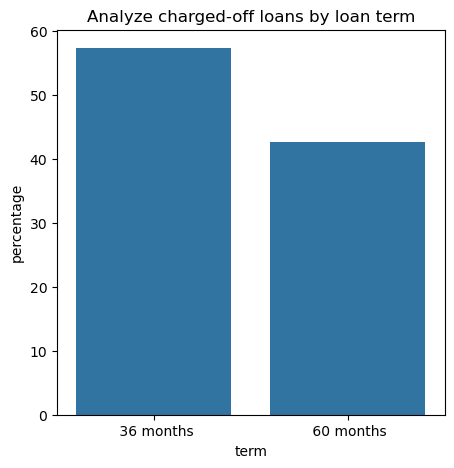

In [60]:
# Check the grade of the loan where most defaults have happened
# Plot a bar graph for loan grade
plt.figure(figsize=(5,5))
sns.barplot(round(df_charged_off['term'].value_counts()/df_charged_off['id'].count() * 100,2))
plt.title('Analyze charged-off loans by loan term')
plt.ylabel('percentage')

### 4.1.2 Analyze the grade and sub-grade categorical variables

Text(0, 0.5, 'percentage')

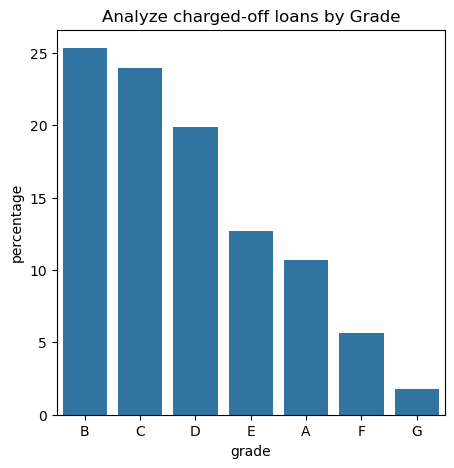

In [61]:
# Check the grade of the loan where most defaults have happened
# Plot a bar graph for loan grade
plt.figure(figsize=(5,5))
sns.barplot(round(df_charged_off['grade'].value_counts()/df_charged_off['grade'].count() * 100,2))
plt.title('Analyze charged-off loans by Grade')
plt.ylabel('percentage')

Text(0, 0.5, 'Percentage')

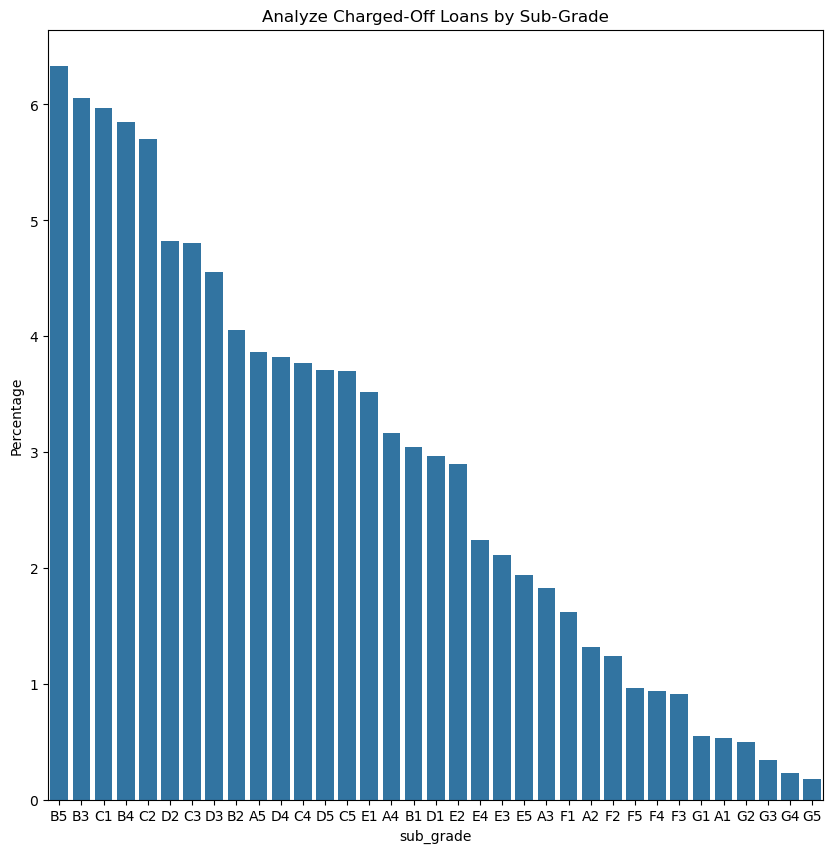

In [62]:
# Check the loan sub-grade of the loan where most defaults have happened
# Plot a bar graph for loan sub-grade
plt.figure(figsize=(10,10))
sns.barplot(round(df_charged_off['sub_grade'].value_counts()/df_charged_off['sub_grade'].count() * 100,2))
plt.title("Analyze Charged-Off Loans by Sub-Grade")
plt.ylabel('Percentage')

#### Step 4.1.3 Analyze the verification status attribute

Text(0, 0.5, 'Percentage')

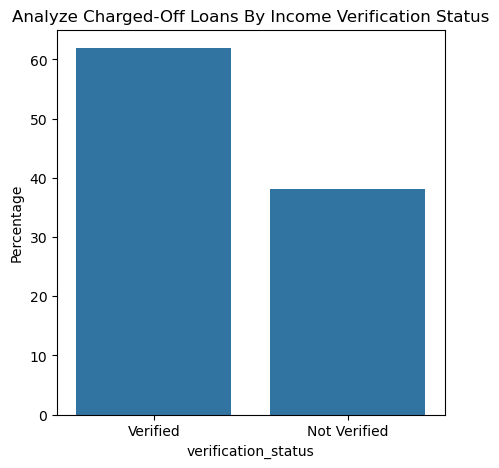

In [63]:
# Plot a bar graph with normalized percentage values for the verfication status
plt.figure(figsize=(5,5))
sns.barplot(round(df_charged_off['verification_status'].value_counts()/df_charged_off['verification_status'].count() * 100,2))
plt.title('Analyze Charged-Off Loans By Income Verification Status')
plt.ylabel('Percentage')

# Conclusion: 
# Appears 65% of cases where income source is verified are defaulting
# Appears 35% of cases where income source is not verified are defaulting

#### Step 4.1.3 Analyze the home ownership attribute

Text(0.5, 1.0, 'Charged Off Loans By Home Ownership Status')

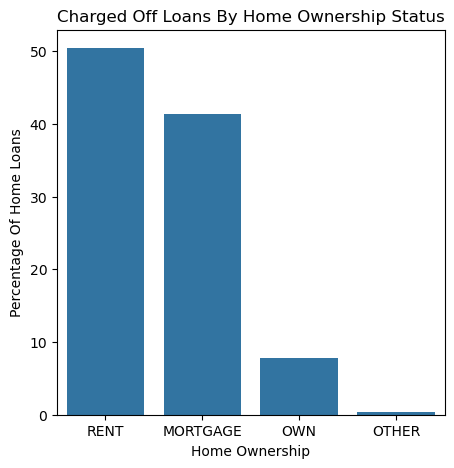

In [64]:
# Plot a bar graph with normalized percentage values for the home ownership attribute
plt.figure(figsize=(5,5))
sns.barplot(round(df_charged_off['home_ownership'].value_counts()/df_charged_off['home_ownership'].count() * 100,2))
plt.ylabel('Percentage Of Home Loans')
plt.xlabel("Home Ownership")
plt.title("Charged Off Loans By Home Ownership Status")

# Conclusiong:
# A mojority of the defaulters are either staying on rent or house is on mortgage

#### Step 4.1.4 Analyze the Employment Length

Text(0.5, 1.0, 'Charged Off Loans By Employment Length')

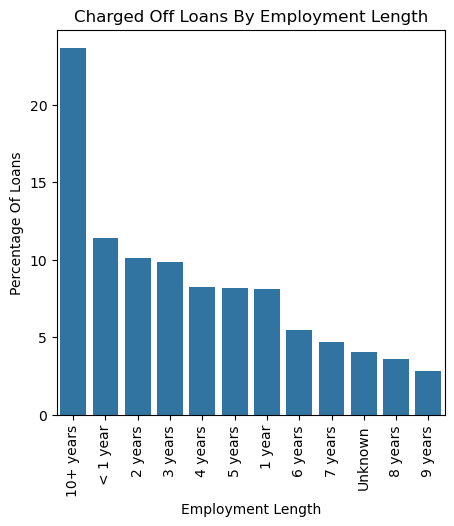

In [65]:
# Plot a bar graph with normalized percentage values for the emp_length attribute
plt.figure(figsize=(5,5))
sns.barplot(round(df_charged_off['emp_length'].value_counts()/df_charged_off['id'].count() * 100,2))
plt.xlabel('Employment Length')
plt.ylabel('Percentage Of Loans')
plt.xticks(rotation=90)
plt.title("Charged Off Loans By Employment Length")

#### Step 4.1.5 Analyze the Purpose Of the loan

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'debt_consolidation'),
  Text(1, 0, 'other'),
  Text(2, 0, 'credit_card'),
  Text(3, 0, 'small_business'),
  Text(4, 0, 'home_improvement'),
  Text(5, 0, 'major_purchase'),
  Text(6, 0, 'car'),
  Text(7, 0, 'medical'),
  Text(8, 0, 'wedding'),
  Text(9, 0, 'moving'),
  Text(10, 0, 'house'),
  Text(11, 0, 'educational'),
  Text(12, 0, 'vacation'),
  Text(13, 0, 'renewable_energy')])

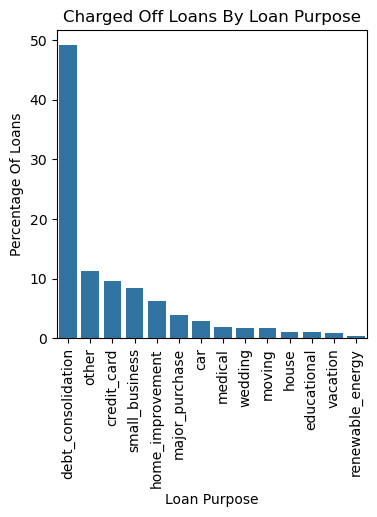

In [66]:
# Plot bar graph with normalized percentage values for the loan purpose attribute 
plt.figure(figsize=(4,4))
sns.barplot(
                round(df_charged_off['purpose'].value_counts()/df_charged_off['id'].count() * 100,2))
plt.title("Charged Off Loans By Loan Purpose")
plt.ylabel('Percentage Of Loans')
plt.xlabel("Loan Purpose")
plt.xticks(rotation=90)

# Conclusion: The below loan pupose saw higher defaults
# Debt Consolidation 
# others
# credit card
# small business 
# home improvement

### Step 4.1.6 Analyze the state where loan was issued

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46],
 [Text(0, 0, 'CA'),
  Text(1, 0, 'FL'),
  Text(2, 0, 'NY'),
  Text(3, 0, 'TX'),
  Text(4, 0, 'NJ'),
  Text(5, 0, 'GA'),
  Text(6, 0, 'IL'),
  Text(7, 0, 'PA'),
  Text(8, 0, 'VA'),
  Text(9, 0, 'MD'),
  Text(10, 0, 'MA'),
  Text(11, 0, 'OH'),
  Text(12, 0, 'WA'),
  Text(13, 0, 'AZ'),
  Text(14, 0, 'NC'),
  Text(15, 0, 'MO'),
  Text(16, 0, 'NV'),
  Text(17, 0, 'MI'),
  Text(18, 0, 'CO'),
  Text(19, 0, 'CT'),
  Text(20, 0, 'MN'),
  Text(21, 0, 'OR'),
  Text(22, 0, 'SC'),
  Text(23, 0, 'WI'),
  Text(24, 0, 'AL'),
  Text(25, 0, 'LA'),
  Text(26, 0, 'KY'),
  Text(27, 0, 'OK'),
  Text(28, 0, 'UT'),
  Text(29, 0, 'KS'),
  Text(30, 0, 'NM'),
  Text(31, 0, 'HI'),
  Text(32, 0, 'AR'),
  Text(33, 0, 'NH'),
  Text(34, 0, 'RI'),
  

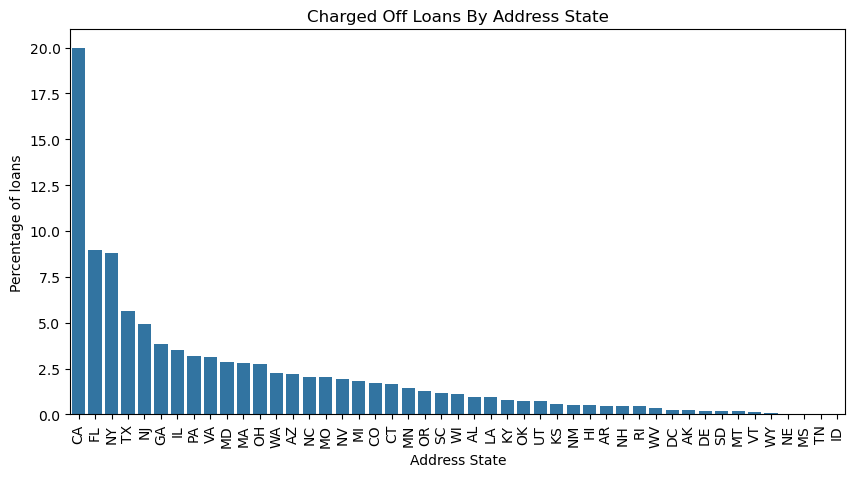

In [67]:
# Plot bar graph with normalized percentage values for the borrower address state
plt.figure(figsize=(10,5))
sns.barplot(round(df_charged_off['addr_state'].value_counts()/df_charged_off['id'].count() * 100,2))
plt.title("Charged Off Loans By Address State")
plt.xlabel('Address State')
plt.ylabel('Percentage of loans')
plt.xticks(rotation=90)
# The states with large number of defaulters are
# CA, FL, NY, TX, NJ

### Step 4.1.7 Analyse the last credit pull date attribute

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82],
 [Text(0, 0, '2016-05-01'),
  Text(1, 0, '2016-04-01'),
  Text(2, 0, '2016-03-01'),
  Text(3, 0, '2016-02-01'),
  Text(4, 0, '2016-01-01'),
  Text(5, 0, '2015-12-01'),
  Text(6, 0, '2015-11-01'),
  Text(7, 0, '2015-10-01'),
  Text(8, 0, '2015-09-01'),
  Text(9, 0, '2015-08-01'),
  Text(10, 0, '2015-07-01'),
  Text(11, 0, '2015-06-01'),
  Text(12, 0, '2015-05-01'),
  Text(13, 0, '2015-04-01'),
  Text(14, 0, '2015-03-01'),
  Text(15, 0, '2015-02-01'),
  Text(16, 0, '2015-01-01'),
  Text(17, 0, '2014-12-01'),

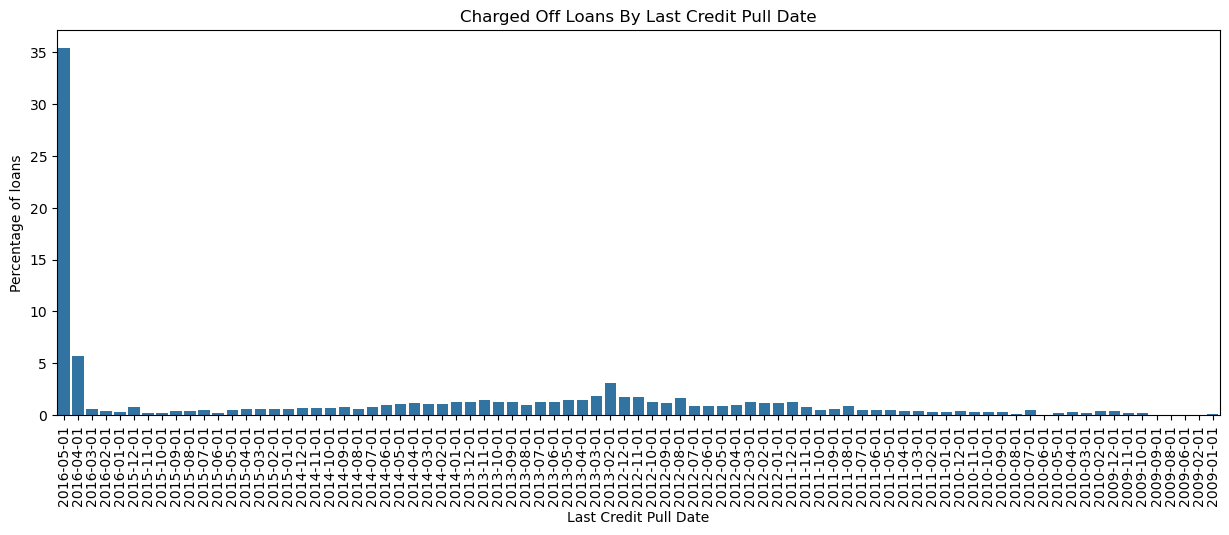

In [68]:
# Analyze the last credit pull date for the customer
df_credit_last_pull_date = round(df_charged_off['last_credit_pull_d'].value_counts()/df_charged_off['id'].count() * 100,2).sort_index(ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(data=df_credit_last_pull_date)
plt.title("Charged Off Loans By Last Credit Pull Date")
plt.xlabel('Last Credit Pull Date')
plt.ylabel('Percentage of loans')
plt.xticks(rotation=90)

## Step 4.2 Univariate Analysis 
## For Discrete and Continuous numerical attributes

### Step 4.2.1 Analyze Loan Amount

Text(0.5, 1.0, 'Distribution Analysis of Loan Amount')

<Figure size 400x400 with 0 Axes>

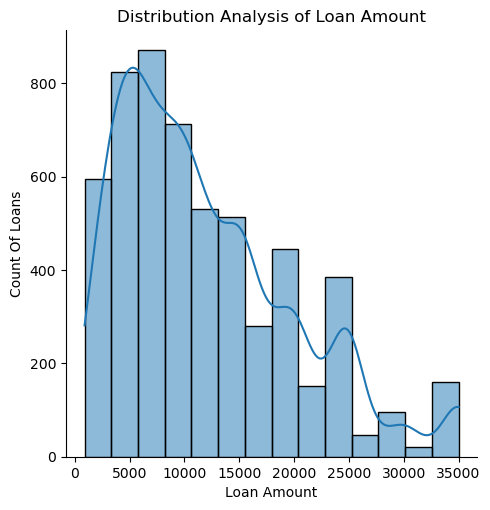

In [69]:
# Check the distribution of the loan amount that was most likely defaulted
plt.figure(figsize=(4,4))
sns.displot(data=df_charged_off, x='loan_amnt', kde=True, binwidth=2500)
plt.ylabel('Count Of Loans')
plt.xlabel('Loan Amount')
plt.title("Distribution Analysis of Loan Amount")

# Conclusion: Loan Amounts Less than 15000 have shown higher tendency for defaults

### Step 4.2.2 Analyze Interest Rate

Text(4.944444444444445, 0.5, 'Count Of Loans')

<Figure size 500x500 with 0 Axes>

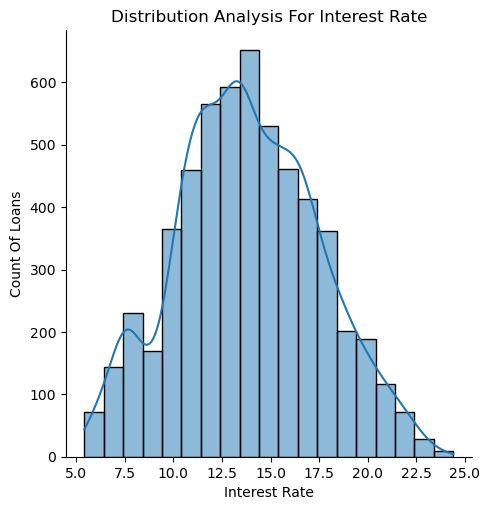

In [70]:
# Check the distribution of the interest rate that was most likely defaulted
# Appears that the concentration is between 10.5 to 17.5
plt.figure(figsize=(5,5))
sns.displot(df_charged_off['int_rate'], kde=True, binwidth=1)
plt.title("Distribution Analysis For Interest Rate")
plt.xlabel('Interest Rate')
plt.ylabel('Count Of Loans')

### Step 4.2.3 Analyze Monthly Installment Amount

Text(0.5, 9.444444444444438, 'Monthly Installments')

<Figure size 400x400 with 0 Axes>

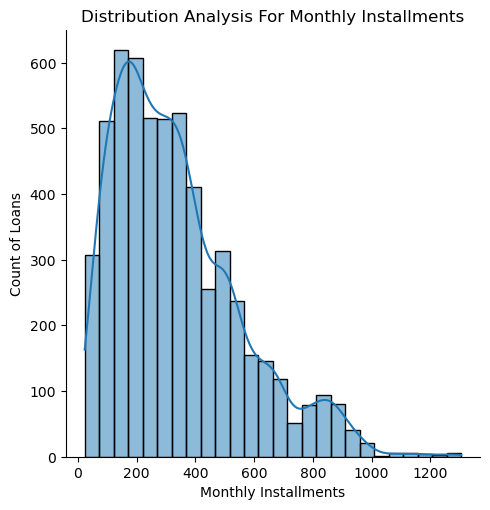

In [71]:
# Check the distribution of the emi percentage that was most likely defaulted
# Appears that the concentration is between 50 to 600
plt.figure(figsize=(4,4))
sns.displot(df_charged_off['installment'], kde=True, binwidth=50)
plt.title('Distribution Analysis For Monthly Installments')
plt.ylabel("Count of Loans")
plt.xlabel("Monthly Installments")

### Step 4.2.4 Analyze Annual Income of the customer

Text(0.5, 9.444444444444438, 'Annual Income(k)')

<Figure size 500x500 with 0 Axes>

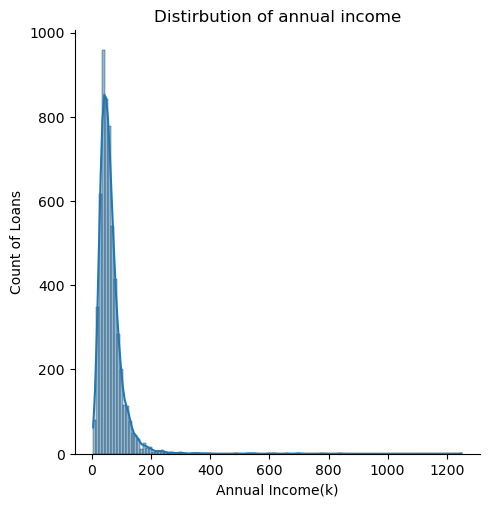

In [72]:
# Check the distribution of the emi percentage that was most likely defaulted
# Appears that the concentration is between 2 to 10
plt.figure(figsize=(5,5))
sns.displot(df_charged_off['annual_inc']/1000, kde=True, binwidth=10)
plt.title("Distirbution of annual income")
plt.ylabel('Count of Loans')
plt.xlabel('Annual Income(k)')

# Conclusion: High chances of default if the customer annual income is upto 75k

### Step 4.2.5 Analyze DTI Percentage of the customer

Text(0.5, 9.444444444444438, 'DTI Percentage')

<Figure size 500x500 with 0 Axes>

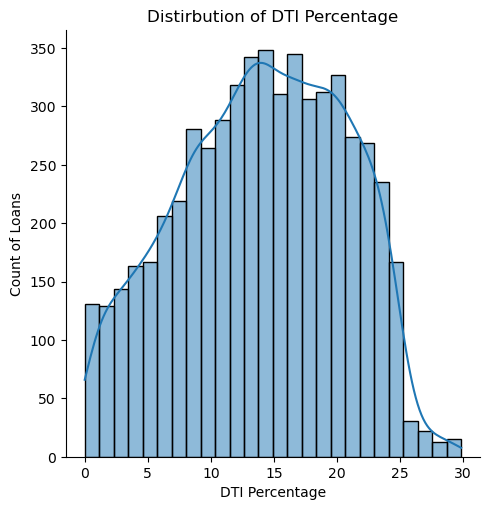

In [73]:
# Check the distribution of the emi percentage that was most likely defaulted
# Appears that the concentration is between 2 to 10
plt.figure(figsize=(5,5))
sns.displot(df_charged_off['dti'], kde=True)
plt.title("Distirbution of DTI Percentage")
plt.ylabel('Count of Loans')
plt.xlabel('DTI Percentage')

### Step 4.2.6 Analyze number of open accounts of the customer

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '7'),
  Text(6, 0, '8'),
  Text(7, 0, '9'),
  Text(8, 0, '10'),
  Text(9, 0, '11'),
  Text(10, 0, '12'),
  Text(11, 0, '13'),
  Text(12, 0, '14'),
  Text(13, 0, '15'),
  Text(14, 0, '16'),
  Text(15, 0, '17'),
  Text(16, 0, '18'),
  Text(17, 0, '19'),
  Text(18, 0, '20'),
  Text(19, 0, '21'),
  Text(20, 0, '22'),
  Text(21, 0, '23'),
  Text(22, 0, '24'),
  Text(23, 0, '25'),
  Text(24, 0, '26'),
  Text(25, 0, '27'),
  Text(26, 0, '28'),
  Text(27, 0, '29'),
  Text(28, 0, '30'),
  Text(29, 0, '31'),
  Text(30, 0, '33'),
  Text(31, 0, '34'),
  Text(32, 0, '35'),
  Text(33, 0, '38')])

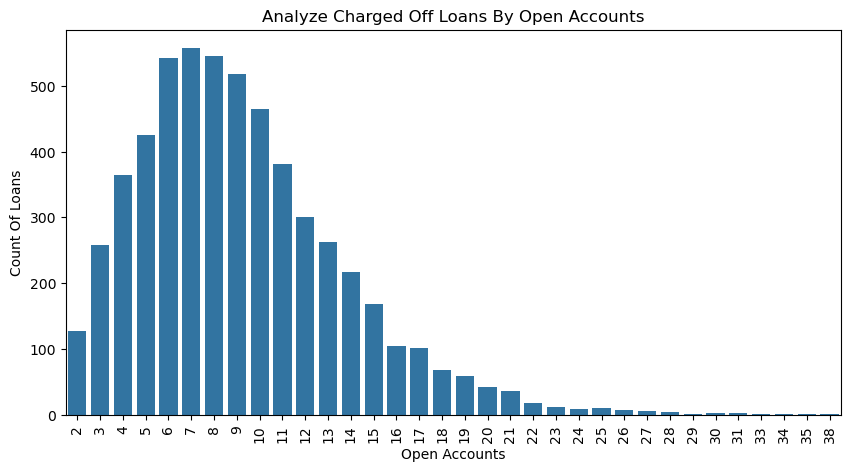

In [74]:
plt.figure(figsize=(10,5))
sns.countplot(df_charged_off, x='open_acc', orient='h')
plt.title('Analyze Charged Off Loans By Open Accounts')
plt.ylabel("Count Of Loans")
plt.xlabel("Open Accounts")
plt.xticks(rotation=90)

### Step 4.2.4 Analyze Monthly Income of the customer

Text(0.5, 9.444444444444438, 'Monthly Income')

<Figure size 1000x500 with 0 Axes>

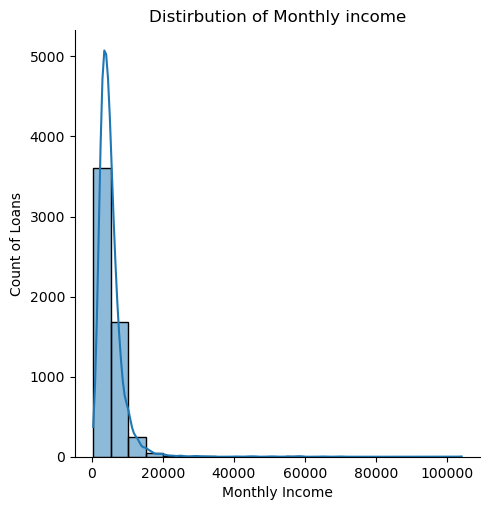

In [75]:
# Check the distribution of the emi percentage that was most likely defaulted
# Appears that the concentration is between 2 to 10
plt.figure(figsize=(10,5))
sns.displot(df_charged_off['monthly_income'], kde=True, binwidth=5000)
plt.title("Distirbution of Monthly income")
plt.ylabel('Count of Loans')
plt.xlabel('Monthly Income')

# Step 5: Perform Segmented Analysis

## Step 5.1 Perform Segmented Analysis On Loan Amount

In [76]:
 df_loan_bucket = round(df_charged_off['loan_amount_bucket'].value_counts()/df_charged_off['id'].count()*100, 2)

In [77]:
df_loan_bucket

loan_amount_bucket
Between 5K-10K     29.18
Less Than 5K       23.35
Between 10K-15K    18.75
Between 20K-25K    13.35
Between 25K-30K     9.63
More than 35K       3.20
Between 30K-35K     2.54
Name: count, dtype: float64

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Between 5K-10K'),
  Text(1, 0, 'Less Than 5K'),
  Text(2, 0, 'Between 10K-15K'),
  Text(3, 0, 'Between 20K-25K'),
  Text(4, 0, 'Between 25K-30K'),
  Text(5, 0, 'More than 35K'),
  Text(6, 0, 'Between 30K-35K')])

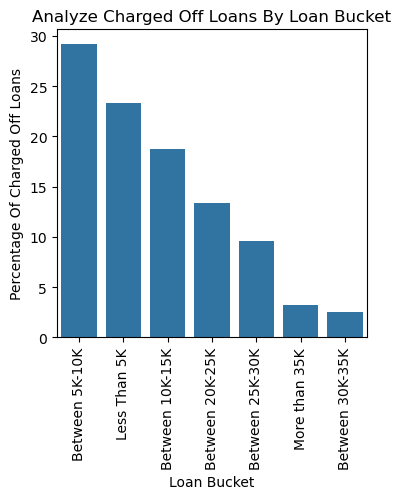

In [78]:
# Count Plot For Loan Bucket
plt.figure(figsize=(4,4))
sns.barplot(data= df_loan_bucket)
plt.title('Analyze Charged Off Loans By Loan Bucket')
plt.ylabel("Percentage Of Charged Off Loans")
plt.xlabel("Loan Bucket")
plt.xticks(rotation=90)

## Step 5.2 Perform Segmented Analysis On Annual Income

In [79]:
df_annual_income_bucket = round(df_charged_off['annual_income_bucket'].value_counts()/df_charged_off['id'].count()*100, 2)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'More than 100K'),
  Text(1, 0, 'Between 30K-40K'),
  Text(2, 0, 'Between 40K-50K'),
  Text(3, 0, 'Between 20K-30K'),
  Text(4, 0, 'Between 10K-20K'),
  Text(5, 0, 'Less Than 10K')])

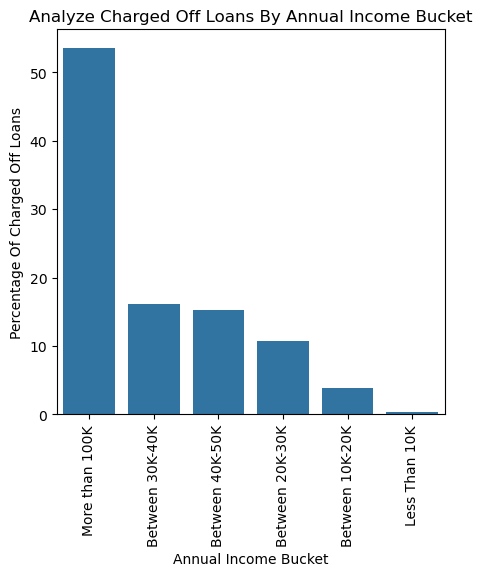

In [80]:
# Count Plot For Annual Income
plt.figure(figsize=(5,5))
sns.barplot(data=df_annual_income_bucket)
plt.title('Analyze Charged Off Loans By Annual Income Bucket')
plt.ylabel("Percentage Of Charged Off Loans")
plt.xlabel("Annual Income Bucket")
plt.xticks(rotation=90)

## Step 5.2 Perform Segmented Analysis On Monthly Income

In [81]:
df_monthly_income_bucket = round(df_charged_off['monthly_income_bucket'].value_counts()/df_charged_off['id'].count()*100, 2)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Less Than 10K'),
  Text(1, 0, 'Between 10K-20K'),
  Text(2, 0, 'Between 20K-30K'),
  Text(3, 0, 'More than 100K'),
  Text(4, 0, 'Between 40K-50K'),
  Text(5, 0, 'Between 30K-40K')])

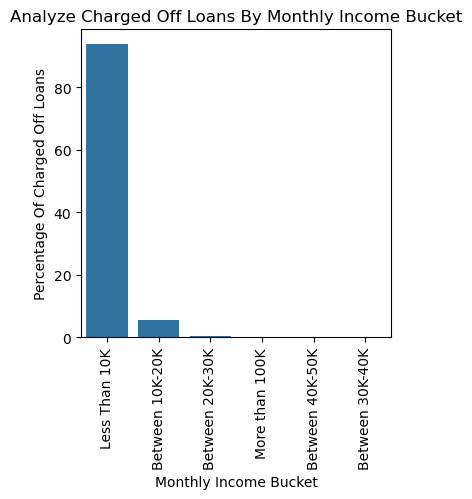

In [82]:
# Count Plot For Annual Income
plt.figure(figsize=(4,4))
sns.barplot(data= df_monthly_income_bucket)
plt.title('Analyze Charged Off Loans By Monthly Income Bucket')
plt.ylabel("Percentage Of Charged Off Loans")
plt.xlabel("Monthly Income Bucket")
plt.xticks(rotation=90)

# Step 6: Perform Bi-Variate Analysis

## Step 6.1 Check the loan amount by term

([0, 1], [Text(0, 0, ' 60 months'), Text(1, 0, ' 36 months')])

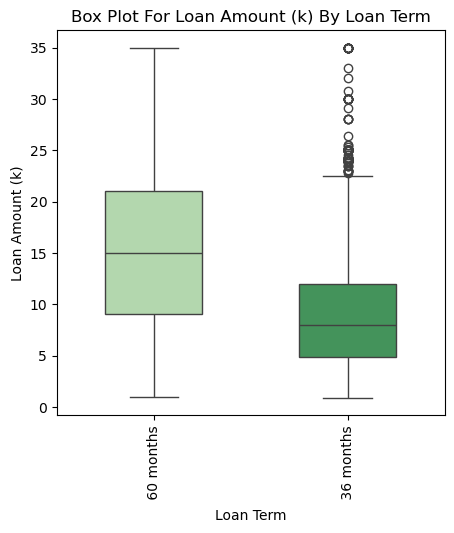

In [83]:
# Use a box plot for the same
plt.figure(figsize=(5,5))
sns.boxplot(
                data=df_charged_off, 
                hue='term', 
                x='term', 
                y=df_charged_off['loan_amnt']/1000, 
                width=0.5,
                palette='Greens'
            )
plt.title("Box Plot For Loan Amount (k) By Loan Term")
plt.ylabel('Loan Amount (k)')
plt.xlabel("Loan Term")
plt.xticks(rotation=90)

# Conclusion:
# Loan value is higher for longer tenure loans 


([0, 1], [Text(0, 0, ' 60 months'), Text(1, 0, ' 36 months')])

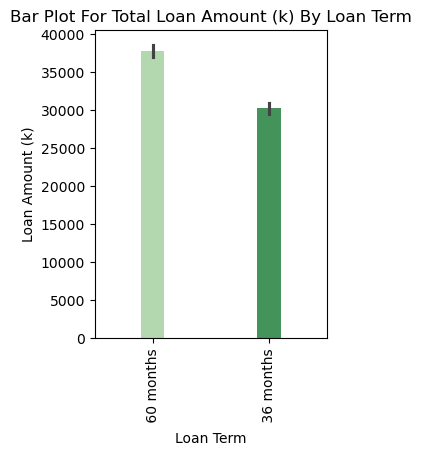

In [84]:
# Use a box plot for the same
plt.figure(figsize=(3,4))
sns.barplot(
                data=df_charged_off, 
                hue='term', 
                x='term', 
                y=df_charged_off['loan_amnt']/1000,
                estimator = "sum", 
                width=0.2,
                palette='Greens'
            )
plt.title("Bar Plot For Total Loan Amount (k) By Loan Term")
plt.ylabel('Loan Amount (k)')
plt.xlabel("Loan Term")
plt.xticks(rotation=90)

# Conclusion:
# Loan value is higher for longer tenure loans 
# (thus if higher tenure loans default there is greater loss)

## Step 6.2 Check the loan amount by purpose

In [123]:
df_temp = round(df_charged_off['purpose'].value_counts()/df_charged_off['id'].count() * 100,2)

In [86]:
df_temp.index

Index(['debt_consolidation', 'other', 'credit_card', 'small_business',
       'home_improvement', 'major_purchase', 'car', 'medical', 'wedding',
       'moving', 'house', 'educational', 'vacation', 'renewable_energy'],
      dtype='object', name='purpose')

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.]),
 [Text(-10000.0, 0, '−10000'),
  Text(0.0, 0, '0'),
  Text(10000.0, 0, '10000'),
  Text(20000.0, 0, '20000'),
  Text(30000.0, 0, '30000'),
  Text(40000.0, 0, '40000')])

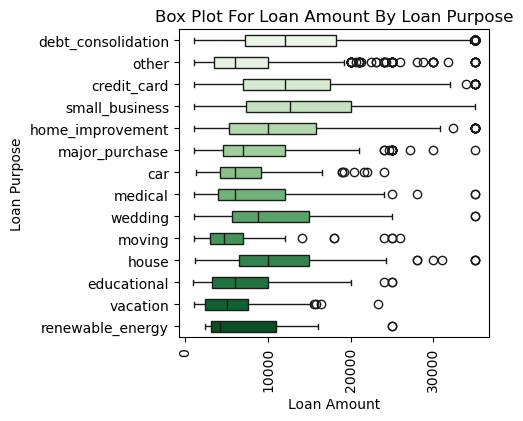

In [126]:
# Use a box plot for the same
plt.figure(figsize=(4,4))
sns.boxplot(
                data=df_charged_off, 
                hue='purpose', 
                x='loan_amnt', 
                y='purpose', 
                width=0.5, 
                hue_order = df_temp.index,
                order = df_temp.index,
                palette='Greens'
            )
plt.title("Box Plot For Loan Amount By Loan Purpose")
plt.xlabel('Loan Amount')
plt.ylabel("Loan Purpose")
plt.xticks(rotation=90)


(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.,
        40000., 45000.]),
 [Text(0.0, 0, '0'),
  Text(5000.0, 0, '5000'),
  Text(10000.0, 0, '10000'),
  Text(15000.0, 0, '15000'),
  Text(20000.0, 0, '20000'),
  Text(25000.0, 0, '25000'),
  Text(30000.0, 0, '30000'),
  Text(35000.0, 0, '35000'),
  Text(40000.0, 0, '40000'),
  Text(45000.0, 0, '45000')])

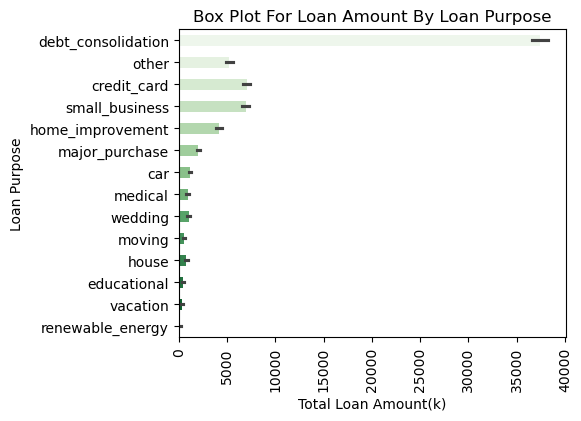

In [125]:
# Use a box plot for the same
plt.figure(figsize=(5,4))
sns.barplot(
                data=df_charged_off, 
                hue='purpose', 
                x=df_charged_off['loan_amnt']/1000, 
                y='purpose',
                estimator="sum", 
                width=0.5,
                hue_order = df_temp.index,
                order = df_temp.index,
                palette='Greens'
            )
plt.title("Box Plot For Loan Amount By Loan Purpose")
plt.xlabel('Total Loan Amount(k)')
plt.ylabel("Loan Purpose")
plt.xticks(rotation=90)

## Step 6.3 Monthly Income By Loan Purpose

In [89]:
df_charged_off[df_charged_off['monthly_income'] > 70000][['annual_inc','monthly_income']].describe()

,annual_inc,monthly_income
count,1.0,1.000000
mean,1250000.0,104166.666667
std,NaN,NaN
min,1250000.0,104166.666667
25%,1250000.0,104166.666667
50%,1250000.0,104166.666667
75%,1250000.0,104166.666667
max,1250000.0,104166.666667


In [90]:
df_charged_off[df_charged_off['annual_inc'] != 1250000]['id'].count()

5626

In [91]:
df_temp = round(df_charged_off['purpose'].value_counts()/df_charged_off['id'].count() * 100,2)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'debt_consolidation'),
  Text(1, 0, 'other'),
  Text(2, 0, 'credit_card'),
  Text(3, 0, 'small_business'),
  Text(4, 0, 'home_improvement'),
  Text(5, 0, 'major_purchase'),
  Text(6, 0, 'car'),
  Text(7, 0, 'medical'),
  Text(8, 0, 'wedding'),
  Text(9, 0, 'moving'),
  Text(10, 0, 'house'),
  Text(11, 0, 'educational'),
  Text(12, 0, 'vacation'),
  Text(13, 0, 'renewable_energy')])

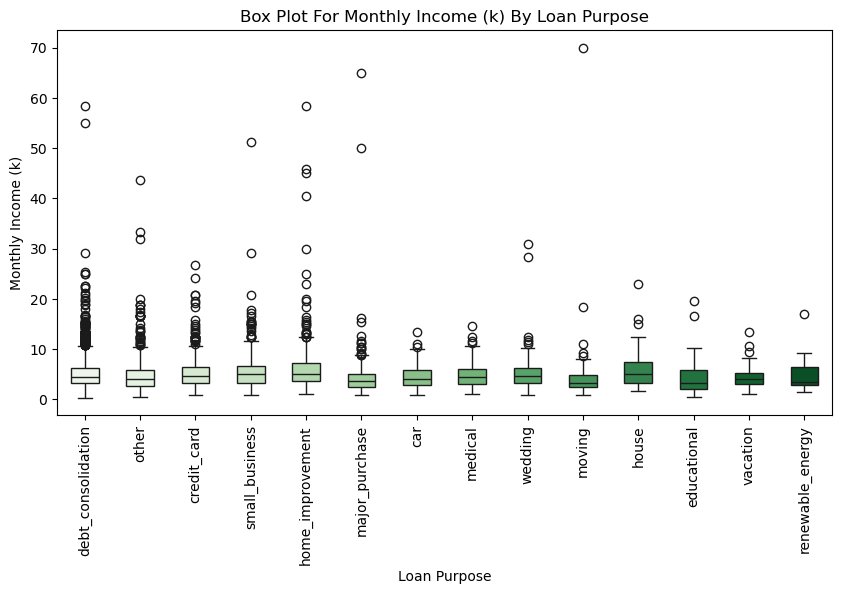

In [92]:
# Use a box plot for the same
plt.figure(figsize=(10,5))
sns.boxplot(
                data=df_charged_off[df_charged_off['annual_inc'] != 1250000], 
                hue='purpose',
                x='purpose', 
                y=df_charged_off['monthly_income']/1000, 
                width=0.5, 
                order = df_temp.index,
                hue_order = df_temp.index,
                palette='Greens',
                legend=False

            )
plt.title("Box Plot For Monthly Income (k) By Loan Purpose")
plt.ylabel('Monthly Income (k)')
plt.xlabel("Loan Purpose")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'debt_consolidation'),
  Text(1, 0, 'other'),
  Text(2, 0, 'credit_card'),
  Text(3, 0, 'small_business'),
  Text(4, 0, 'home_improvement'),
  Text(5, 0, 'major_purchase'),
  Text(6, 0, 'car'),
  Text(7, 0, 'medical'),
  Text(8, 0, 'wedding'),
  Text(9, 0, 'moving'),
  Text(10, 0, 'house'),
  Text(11, 0, 'educational'),
  Text(12, 0, 'vacation'),
  Text(13, 0, 'renewable_energy')])

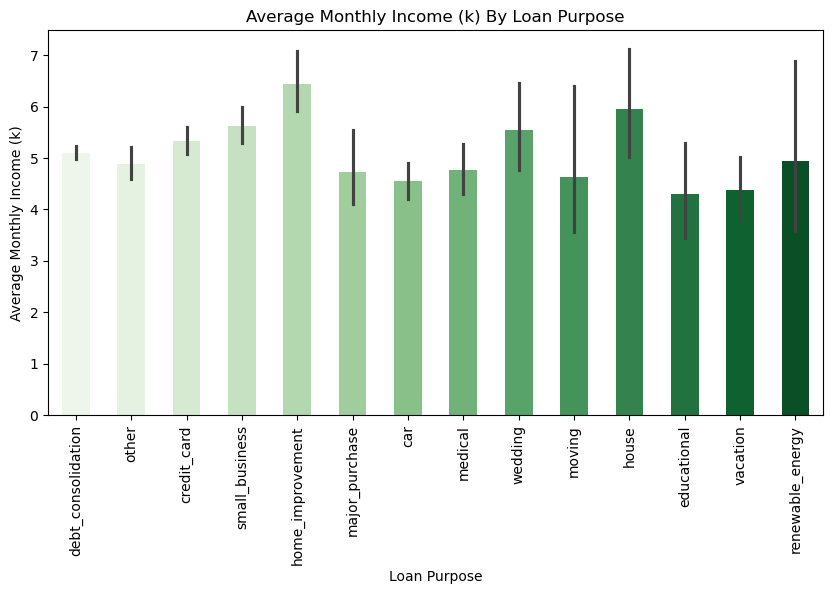

In [93]:
plt.figure(figsize=(10,5))
sns.barplot(
                data=df_charged_off[df_charged_off['annual_inc'] != 1250000], 
                hue='purpose',
                x='purpose', 
                y=df_charged_off['monthly_income']/1000, 
                width=0.5, 
                order = df_temp.index,
                hue_order = df_temp.index,
                palette='Greens',
                legend=False
            )
plt.title("Average Monthly Income (k) By Loan Purpose")
plt.ylabel('Average Monthly Income (k)')
plt.xlabel("Loan Purpose")
plt.xticks(rotation=90)

## Step 6.4 Loan Amount By Grade

In [94]:
df_temp = round(df_charged_off['grade'].value_counts()/df_charged_off['grade'].count() * 100,2)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'B'),
  Text(1, 0, 'C'),
  Text(2, 0, 'D'),
  Text(3, 0, 'E'),
  Text(4, 0, 'A'),
  Text(5, 0, 'F'),
  Text(6, 0, 'G')])

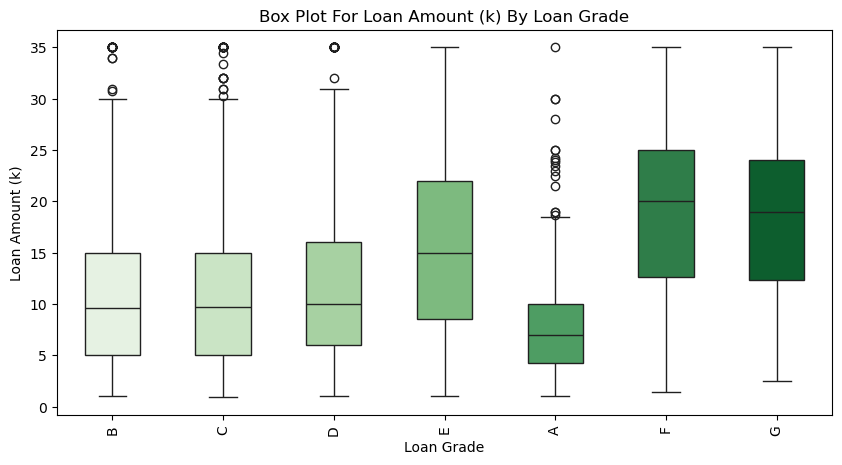

In [95]:
plt.figure(figsize=(10,5))
sns.boxplot(
                data=df_charged_off, 
                hue='grade',
                x='grade', 
                y=df_charged_off['loan_amnt']/1000, 
                width=0.5, 
                order = df_temp.index,
                hue_order = df_temp.index,
                palette='Greens',
                legend=False

            )
plt.title("Box Plot For Loan Amount (k) By Loan Grade")
plt.ylabel('Loan Amount (k)')
plt.xlabel("Loan Grade")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'B'),
  Text(1, 0, 'C'),
  Text(2, 0, 'D'),
  Text(3, 0, 'E'),
  Text(4, 0, 'A'),
  Text(5, 0, 'F'),
  Text(6, 0, 'G')])

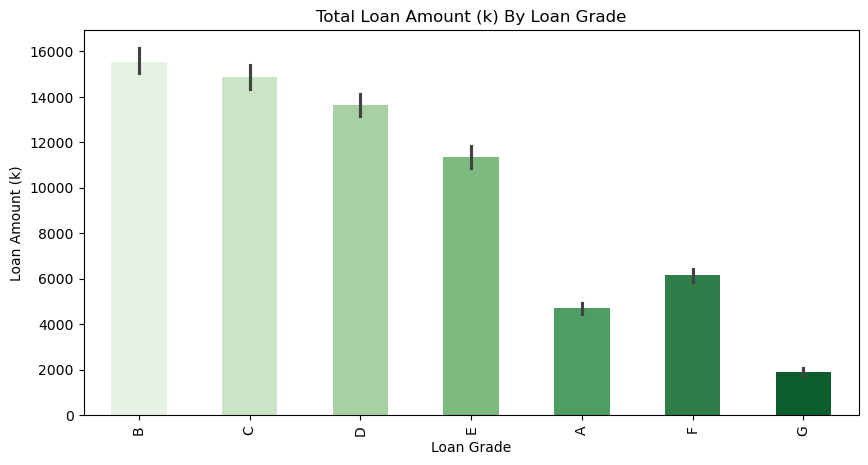

In [96]:
plt.figure(figsize=(10,5))
sns.barplot(
                data=df_charged_off, 
                hue='grade',
                x='grade', 
                y=df_charged_off['loan_amnt']/1000, 
                width=0.5,
                estimator = 'sum', 
                order = df_temp.index,
                hue_order = df_temp.index,
                palette='Greens',
                legend=False

            )
plt.title("Total Loan Amount (k) By Loan Grade")
plt.ylabel('Loan Amount (k)')
plt.xlabel("Loan Grade")
plt.xticks(rotation=90)

## Step 6.5 Loan Amount By Home Ownership

In [130]:
df_temp = round(df_charged_off['home_ownership'].value_counts()/df_charged_off['home_ownership'].count() * 100,2)

(array([-10.,   0.,  10.,  20.,  30.,  40.]),
 [Text(-10.0, 0, '−10'),
  Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40')])

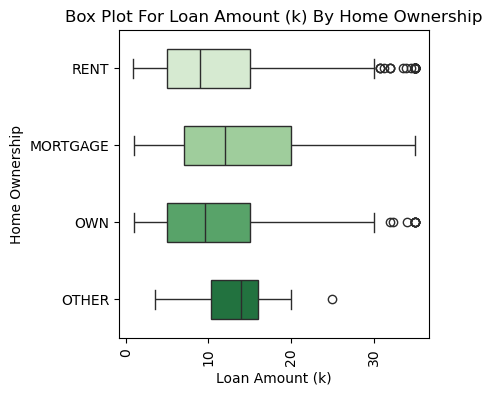

In [134]:
plt.figure(figsize=(4,4))
sns.boxplot(
                data=df_charged_off, 
                hue='home_ownership',
                x=df_charged_off['loan_amnt']/1000, 
                y='home_ownership', 
                width=0.5,
                order = df_temp.index,
                hue_order = df_temp.index,
                palette='Greens',
                legend=False

            )
plt.title("Box Plot For Loan Amount (k) By Home Ownership")
plt.xlabel('Loan Amount (k)')
plt.ylabel("Home Ownership")
plt.xticks(rotation=90)

(array([    0., 10000., 20000., 30000., 40000.]),
 [Text(0.0, 0, '0'),
  Text(10000.0, 0, '10000'),
  Text(20000.0, 0, '20000'),
  Text(30000.0, 0, '30000'),
  Text(40000.0, 0, '40000')])

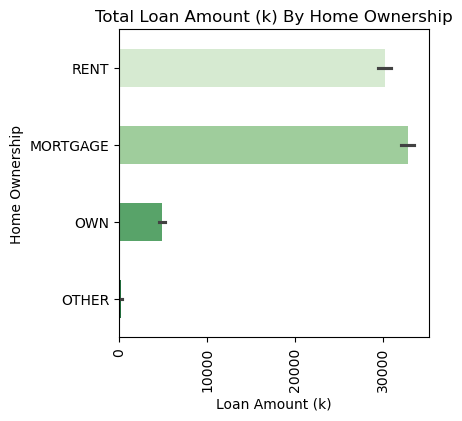

In [133]:
plt.figure(figsize=(4,4))
sns.barplot(
                data=df_charged_off, 
                hue='home_ownership',
                x=df_charged_off['loan_amnt']/1000, 
                y='home_ownership', 
                width=0.5,
                estimator = 'sum', 
                order = df_temp.index,
                hue_order = df_temp.index,
                palette='Greens',
                legend=False

            )
plt.title("Total Loan Amount (k) By Home Ownership")
plt.xlabel('Loan Amount (k)')
plt.ylabel("Home Ownership")
plt.xticks(rotation=90)

## Step 6.6 Loan Amount By Address State

In [140]:
df_temp = round(df_charged_off['addr_state'].value_counts()/df_charged_off['id'].count() * 100,2)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46],
 [Text(0, 0, 'CA'),
  Text(1, 0, 'FL'),
  Text(2, 0, 'NY'),
  Text(3, 0, 'TX'),
  Text(4, 0, 'NJ'),
  Text(5, 0, 'GA'),
  Text(6, 0, 'IL'),
  Text(7, 0, 'PA'),
  Text(8, 0, 'VA'),
  Text(9, 0, 'MD'),
  Text(10, 0, 'MA'),
  Text(11, 0, 'OH'),
  Text(12, 0, 'WA'),
  Text(13, 0, 'AZ'),
  Text(14, 0, 'NC'),
  Text(15, 0, 'MO'),
  Text(16, 0, 'NV'),
  Text(17, 0, 'MI'),
  Text(18, 0, 'CO'),
  Text(19, 0, 'CT'),
  Text(20, 0, 'MN'),
  Text(21, 0, 'OR'),
  Text(22, 0, 'SC'),
  Text(23, 0, 'WI'),
  Text(24, 0, 'AL'),
  Text(25, 0, 'LA'),
  Text(26, 0, 'KY'),
  Text(27, 0, 'OK'),
  Text(28, 0, 'UT'),
  Text(29, 0, 'KS'),
  Text(30, 0, 'NM'),
  Text(31, 0, 'HI'),
  Text(32, 0, 'AR'),
  Text(33, 0, 'NH'),
  Text(34, 0, 'RI'),
  

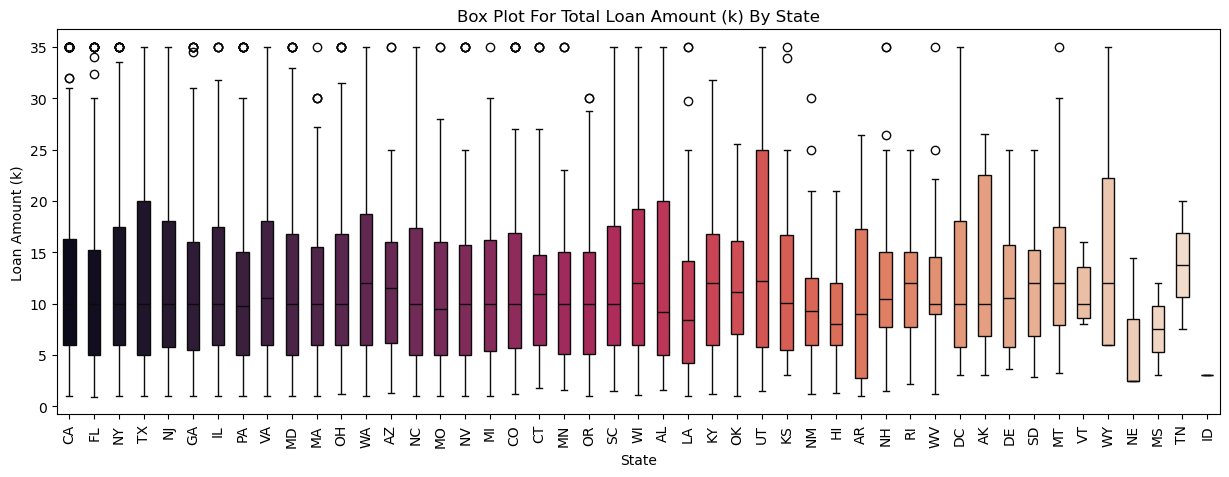

In [148]:
plt.figure(figsize=(15,5))
sns.boxplot(
                data=df_charged_off, 
                hue='addr_state',
                x='addr_state', 
                y=df_charged_off['loan_amnt']/1000, 
                width=0.5,
                order = df_temp.index,
                hue_order = df_temp.index,
                palette='rocket',
                legend=False

            )
plt.title("Box Plot For Total Loan Amount (k) By State")
plt.ylabel('Loan Amount (k)')
plt.xlabel("State")
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46],
 [Text(0, 0, 'CA'),
  Text(1, 0, 'FL'),
  Text(2, 0, 'NY'),
  Text(3, 0, 'TX'),
  Text(4, 0, 'NJ'),
  Text(5, 0, 'GA'),
  Text(6, 0, 'IL'),
  Text(7, 0, 'PA'),
  Text(8, 0, 'VA'),
  Text(9, 0, 'MD'),
  Text(10, 0, 'MA'),
  Text(11, 0, 'OH'),
  Text(12, 0, 'WA'),
  Text(13, 0, 'AZ'),
  Text(14, 0, 'NC'),
  Text(15, 0, 'MO'),
  Text(16, 0, 'NV'),
  Text(17, 0, 'MI'),
  Text(18, 0, 'CO'),
  Text(19, 0, 'CT'),
  Text(20, 0, 'MN'),
  Text(21, 0, 'OR'),
  Text(22, 0, 'SC'),
  Text(23, 0, 'WI'),
  Text(24, 0, 'AL'),
  Text(25, 0, 'LA'),
  Text(26, 0, 'KY'),
  Text(27, 0, 'OK'),
  Text(28, 0, 'UT'),
  Text(29, 0, 'KS'),
  Text(30, 0, 'NM'),
  Text(31, 0, 'HI'),
  Text(32, 0, 'AR'),
  Text(33, 0, 'NH'),
  Text(34, 0, 'RI'),
  

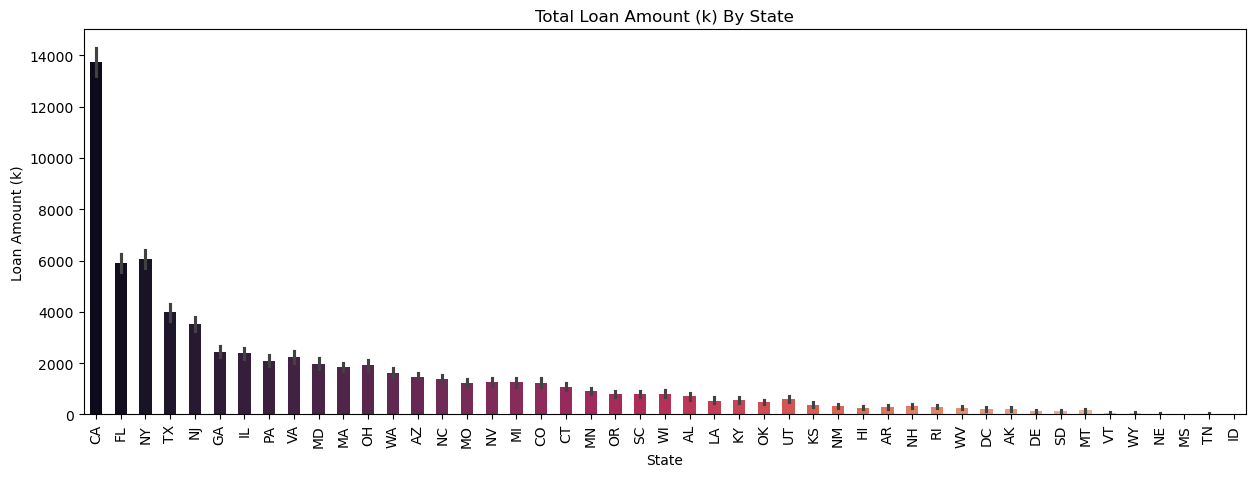

In [145]:
plt.figure(figsize=(15,5))
sns.barplot(
                data=df_charged_off, 
                hue='addr_state',
                x='addr_state', 
                y=df_charged_off['loan_amnt']/1000, 
                width=0.5,
                estimator = 'sum', 
                order = df_temp.index,
                hue_order = df_temp.index,
                palette='rocket',
                legend=False

            )
plt.title("Total Loan Amount (k) By State")
plt.ylabel('Loan Amount (k)')
plt.xlabel("State")
plt.xticks(rotation=90)

## Step 6.7 Loan Amount By Employment Length

In [150]:
df_temp = round(df_charged_off['emp_length'].value_counts()/df_charged_off['id'].count() * 100,2)

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(-5.0, 0, '−5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35'),
  Text(40.0, 0, '40')])

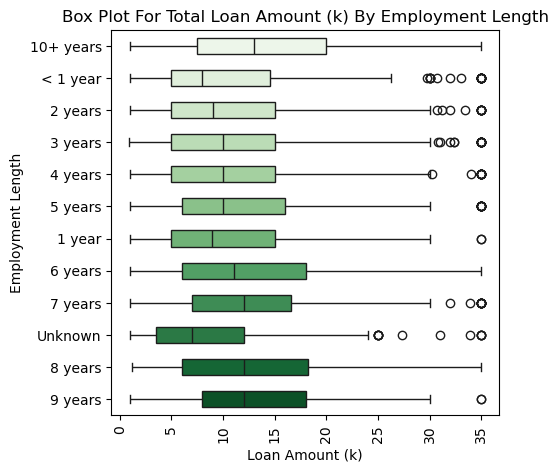

In [154]:
plt.figure(figsize=(5,5))
sns.boxplot(
                data=df_charged_off, 
                hue='emp_length',
                x=df_charged_off['loan_amnt']/1000, 
                y='emp_length', 
                width=0.5,
                order = df_temp.index,
                hue_order = df_temp.index,
                palette='Greens',
                legend=False

            )
plt.title("Box Plot For Total Loan Amount (k) By Employment Length")
plt.xlabel('Loan Amount (k)')
plt.ylabel("Employment Length")
plt.xticks(rotation=90)

(array([    0.,  2500.,  5000.,  7500., 10000., 12500., 15000., 17500.,
        20000., 22500.]),
 [Text(0.0, 0, '0'),
  Text(2500.0, 0, '2500'),
  Text(5000.0, 0, '5000'),
  Text(7500.0, 0, '7500'),
  Text(10000.0, 0, '10000'),
  Text(12500.0, 0, '12500'),
  Text(15000.0, 0, '15000'),
  Text(17500.0, 0, '17500'),
  Text(20000.0, 0, '20000'),
  Text(22500.0, 0, '22500')])

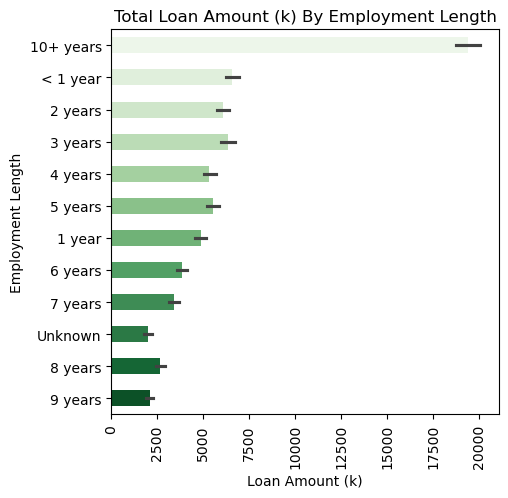

In [158]:
plt.figure(figsize=(5,5))
sns.barplot(
                data=df_charged_off, 
                hue='emp_length',
                x=df_charged_off['loan_amnt']/1000, 
                y='emp_length', 
                width=0.5,
                estimator='sum',
                order = df_temp.index,
                hue_order = df_temp.index,
                palette='Greens',
                legend=False

            )
plt.title("Total Loan Amount (k) By Employment Length")
plt.xlabel('Loan Amount (k)')
plt.ylabel("Employment Length")
plt.xticks(rotation=90)

## Step 6.7 Loan Amount By Monthly Income Bucket

In [165]:
df_temp = round(df_charged_off['monthly_income_bucket'].value_counts()/df_charged_off['id'].count() * 100,2)

(array([-10.,   0.,  10.,  20.,  30.,  40.]),
 [Text(-10.0, 0, '−10'),
  Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40')])

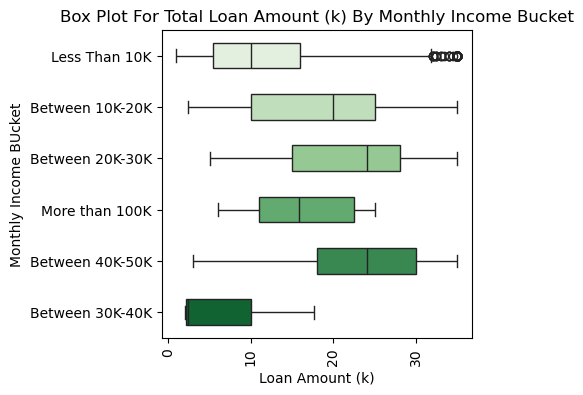

In [167]:
plt.figure(figsize=(4,4))
sns.boxplot(
                data=df_charged_off, 
                hue='monthly_income_bucket',
                x=df_charged_off['loan_amnt']/1000, 
                y='monthly_income_bucket', 
                width=0.5,
                order = df_temp.index,
                hue_order = df_temp.index,
                palette='Greens',
                legend=False

            )
plt.title("Box Plot For Total Loan Amount (k) By Monthly Income Bucket")
plt.xlabel('Loan Amount (k)')
plt.ylabel("Monthly Income BUcket")
plt.xticks(rotation=90)

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.]),
 [Text(0.0, 0, '0'),
  Text(10000.0, 0, '10000'),
  Text(20000.0, 0, '20000'),
  Text(30000.0, 0, '30000'),
  Text(40000.0, 0, '40000'),
  Text(50000.0, 0, '50000'),
  Text(60000.0, 0, '60000'),
  Text(70000.0, 0, '70000')])

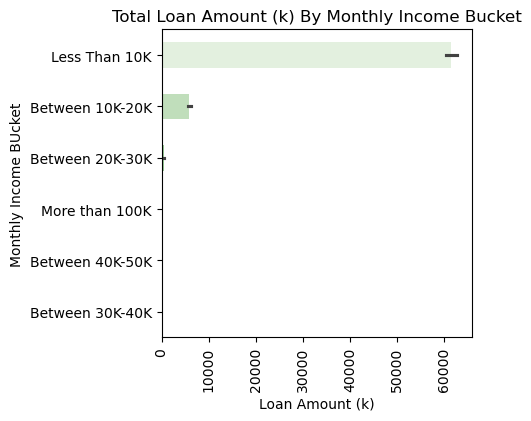

In [175]:
plt.figure(figsize=(4,4))
sns.barplot(
                data=df_charged_off, 
                hue='monthly_income_bucket',
                x=df_charged_off['loan_amnt']/1000, 
                y='monthly_income_bucket', 
                width=0.5,
                estimator='sum', 
                order = df_temp.index,
                hue_order = df_temp.index,
                palette='Greens',
                legend=False

            )
plt.title("Total Loan Amount (k) By Monthly Income Bucket")
plt.xlabel('Loan Amount (k)')
plt.ylabel("Monthly Income BUcket")
plt.xticks(rotation=90)

# Step 7: Multivariate Analysis

## Step 7.1 Check the loan amount by tenure by purpose

In [137]:
df_temp = round(df_charged_off['purpose'].value_counts()/df_charged_off['id'].count() * 100,2)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'debt_consolidation'),
  Text(1, 0, 'other'),
  Text(2, 0, 'credit_card'),
  Text(3, 0, 'small_business'),
  Text(4, 0, 'home_improvement'),
  Text(5, 0, 'major_purchase'),
  Text(6, 0, 'car'),
  Text(7, 0, 'medical'),
  Text(8, 0, 'wedding'),
  Text(9, 0, 'moving'),
  Text(10, 0, 'house'),
  Text(11, 0, 'educational'),
  Text(12, 0, 'vacation'),
  Text(13, 0, 'renewable_energy')])

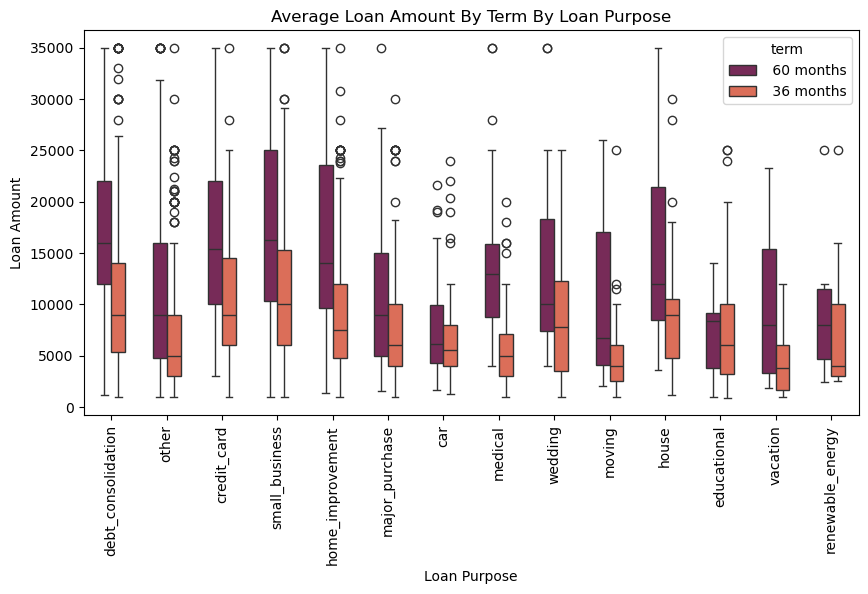

In [102]:
plt.figure(figsize=(10,5))
sns.boxplot(
                data=df_charged_off, 
                hue='term', 
                x='purpose', 
                y='loan_amnt', 
                width=0.5, 
                hue_order = df_charged_off['term'].unique().sort(),
                order = df_temp.index,
                palette='rocket'
            )
plt.title("Average Loan Amount By Term By Loan Purpose")
plt.ylabel('Loan Amount')
plt.xlabel("Loan Purpose")
plt.xticks(rotation=90)

(array([    0.,  5000., 10000., 15000., 20000., 25000.]),
 [Text(0.0, 0, '0'),
  Text(5000.0, 0, '5000'),
  Text(10000.0, 0, '10000'),
  Text(15000.0, 0, '15000'),
  Text(20000.0, 0, '20000'),
  Text(25000.0, 0, '25000')])

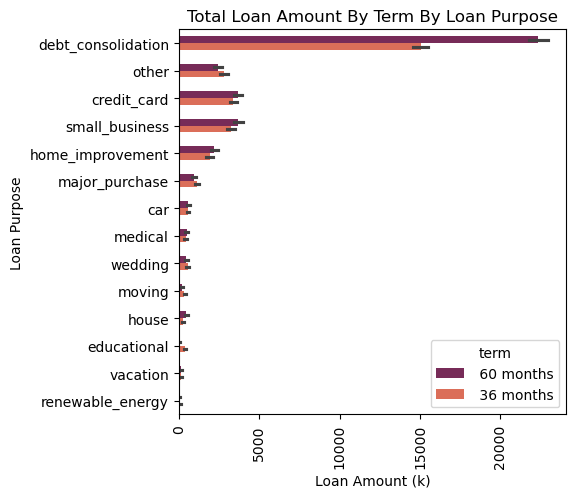

In [138]:
plt.figure(figsize=(5,5))
sns.barplot(
                data=df_charged_off, 
                hue='term', 
                x=df_charged_off['loan_amnt']/1000, 
                y='purpose', 
                width=0.5,
                estimator='sum', 
                hue_order = df_charged_off['term'].unique().sort(),
                order = df_temp.index,
                palette='rocket'
            )
plt.title("Total Loan Amount By Term By Loan Purpose")
plt.xlabel('Loan Amount (k)')
plt.ylabel("Loan Purpose")
plt.xticks(rotation=90)

## Step 7.2 Check the monthly income by tenure by purpose

In [104]:
df_temp = round(df_charged_off['purpose'].value_counts()/df_charged_off['id'].count() * 100,2)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'debt_consolidation'),
  Text(1, 0, 'other'),
  Text(2, 0, 'credit_card'),
  Text(3, 0, 'small_business'),
  Text(4, 0, 'home_improvement'),
  Text(5, 0, 'major_purchase'),
  Text(6, 0, 'car'),
  Text(7, 0, 'medical'),
  Text(8, 0, 'wedding'),
  Text(9, 0, 'moving'),
  Text(10, 0, 'house'),
  Text(11, 0, 'educational'),
  Text(12, 0, 'vacation'),
  Text(13, 0, 'renewable_energy')])

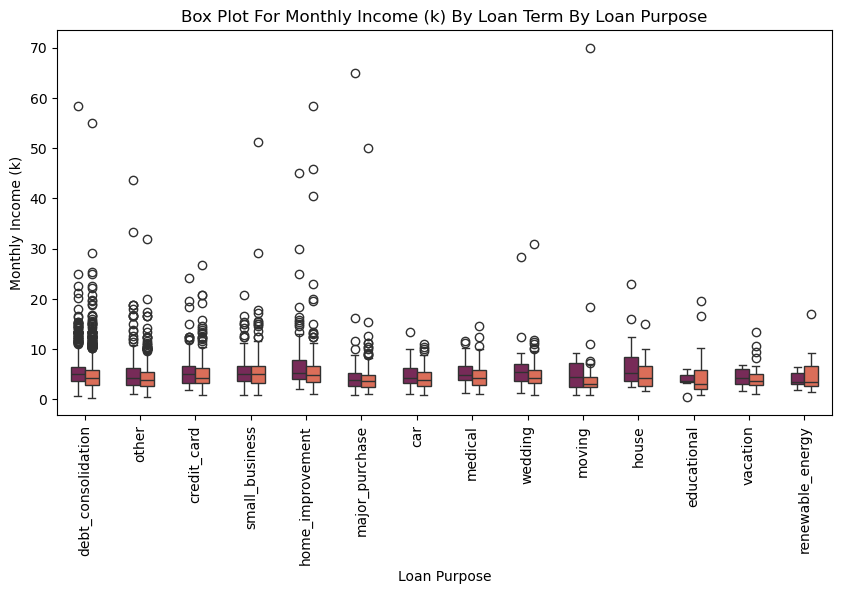

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(
                data=df_charged_off[df_charged_off['annual_inc'] != 1250000], 
                hue='term',
                x='purpose', 
                y=df_charged_off['monthly_income']/1000, 
                width=0.5, 
                order = df_temp.index,
                hue_order = df_charged_off['term'].unique().sort(),
                palette='rocket'

            )
plt.title("Box Plot For Monthly Income (k) By Loan Term By Loan Purpose")
plt.ylabel('Monthly Income (k)')
plt.xlabel("Loan Purpose")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'debt_consolidation'),
  Text(1, 0, 'other'),
  Text(2, 0, 'credit_card'),
  Text(3, 0, 'small_business'),
  Text(4, 0, 'home_improvement'),
  Text(5, 0, 'major_purchase'),
  Text(6, 0, 'car'),
  Text(7, 0, 'medical'),
  Text(8, 0, 'wedding'),
  Text(9, 0, 'moving'),
  Text(10, 0, 'house'),
  Text(11, 0, 'educational'),
  Text(12, 0, 'vacation'),
  Text(13, 0, 'renewable_energy')])

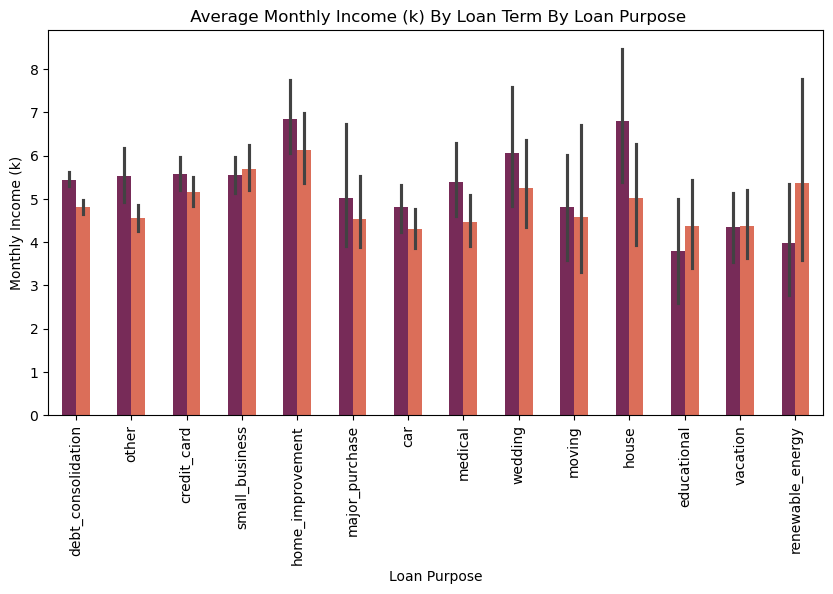

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(
                data=df_charged_off[df_charged_off['annual_inc'] != 1250000], 
                hue='term',
                x='purpose', 
                y=df_charged_off['monthly_income']/1000, 
                width=0.5, 
                order = df_temp.index,
                hue_order = df_charged_off['term'].unique().sort(),
                palette='rocket'

            )
plt.title(" Average Monthly Income (k) By Loan Term By Loan Purpose")
plt.ylabel('Monthly Income (k)')
plt.xlabel("Loan Purpose")
plt.xticks(rotation=90)

## Step 7.3 Loan Amount By Loan Term By Grade 

In [107]:
df_temp = round(df_charged_off['grade'].value_counts()/df_charged_off['grade'].count() * 100,2)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'B'),
  Text(1, 0, 'C'),
  Text(2, 0, 'D'),
  Text(3, 0, 'E'),
  Text(4, 0, 'A'),
  Text(5, 0, 'F'),
  Text(6, 0, 'G')])

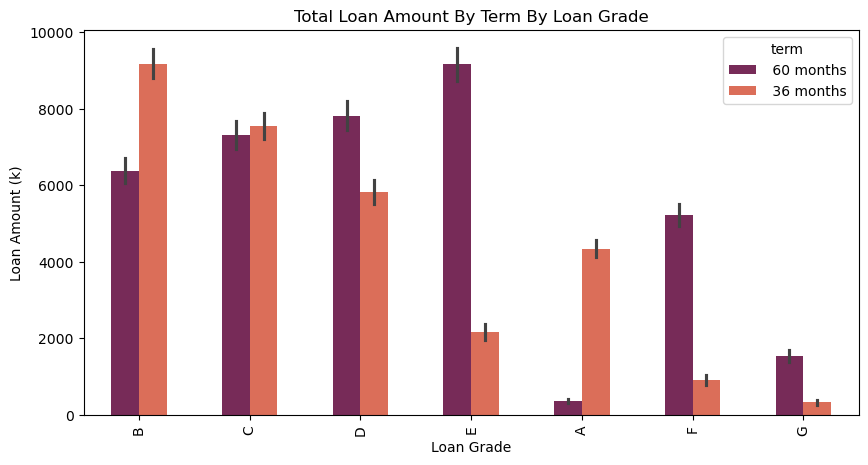

In [108]:
plt.figure(figsize=(10,5))
sns.barplot(
                data=df_charged_off, 
                hue='term', 
                x='grade', 
                y=df_charged_off['loan_amnt']/1000, 
                width=0.5,
                estimator='sum', 
                hue_order = df_charged_off['term'].unique().sort(),
                order = df_temp.index,
                palette='rocket'
            )
plt.title("Total Loan Amount By Term By Loan Grade")
plt.ylabel('Loan Amount (k)')
plt.xlabel("Loan Grade")
plt.xticks(rotation=90)

## Step 7.4 Loan Amount By Loan Term By Verification Status

In [109]:
df_temp = round(df_charged_off['verification_status'].value_counts()/df_charged_off['verification_status'].count() * 100,2)

([0, 1], [Text(0, 0, 'Verified'), Text(1, 0, 'Not Verified')])

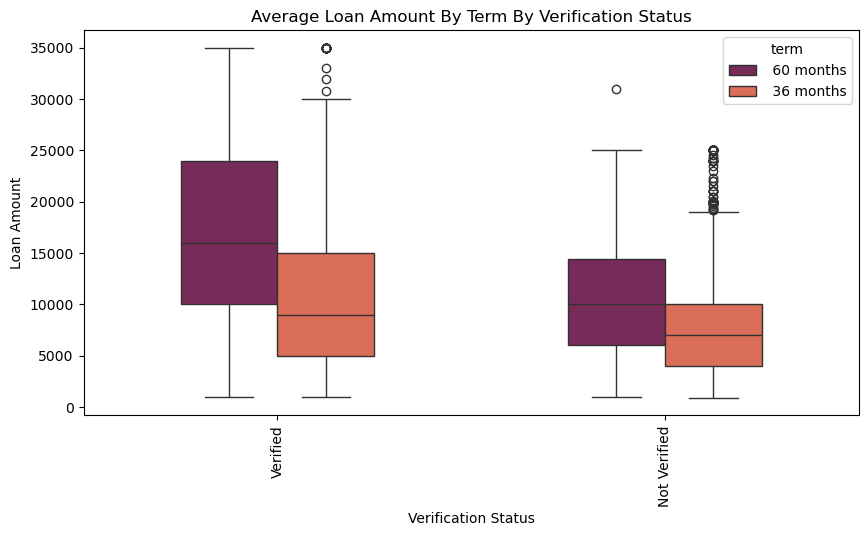

In [110]:
plt.figure(figsize=(10,5))
sns.boxplot(
                data=df_charged_off, 
                hue='term', 
                x='verification_status', 
                y='loan_amnt', 
                width=0.5, 
                hue_order = df_charged_off['term'].unique().sort(),
                order = df_temp.index,
                palette='rocket'
            )
plt.title("Average Loan Amount By Term By Verification Status")
plt.ylabel('Loan Amount')
plt.xlabel("Verification Status")
plt.xticks(rotation=90)

([0, 1], [Text(0, 0, 'Verified'), Text(1, 0, 'Not Verified')])

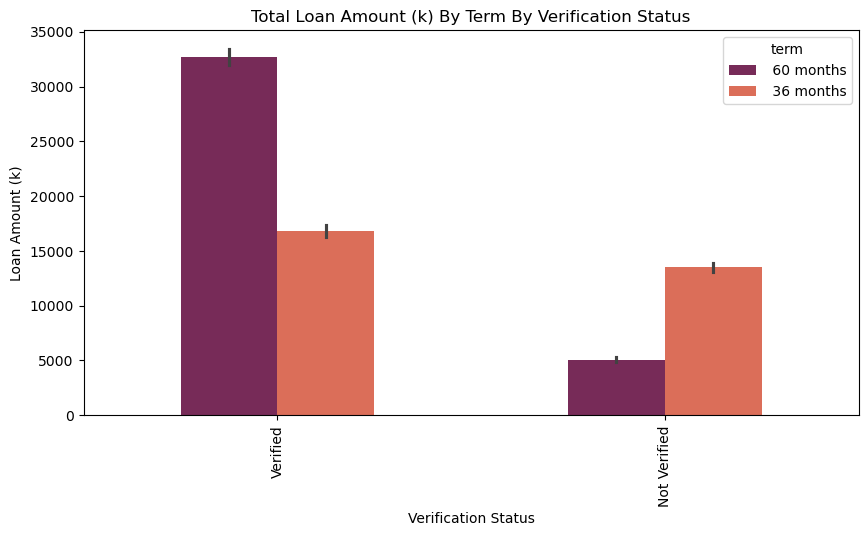

In [111]:
plt.figure(figsize=(10,5))
sns.barplot(
                data=df_charged_off, 
                hue='term', 
                x='verification_status', 
                y=df_charged_off['loan_amnt']/1000, 
                width=0.5,
                estimator='sum', 
                hue_order = df_charged_off['term'].unique().sort(),
                order = df_temp.index,
                palette='rocket'
            )
plt.title("Total Loan Amount (k) By Term By Verification Status")
plt.ylabel('Loan Amount (k)')
plt.xlabel("Verification Status")
plt.xticks(rotation=90)

#### Step 7.5 Total Loan By Loan Term By House Ownership

In [135]:
df_temp = round(df_charged_off['home_ownership'].value_counts()/df_charged_off['home_ownership'].count() * 100,2)

(array([    0.,  2500.,  5000.,  7500., 10000., 12500., 15000., 17500.,
        20000., 22500.]),
 [Text(0.0, 0, '0'),
  Text(2500.0, 0, '2500'),
  Text(5000.0, 0, '5000'),
  Text(7500.0, 0, '7500'),
  Text(10000.0, 0, '10000'),
  Text(12500.0, 0, '12500'),
  Text(15000.0, 0, '15000'),
  Text(17500.0, 0, '17500'),
  Text(20000.0, 0, '20000'),
  Text(22500.0, 0, '22500')])

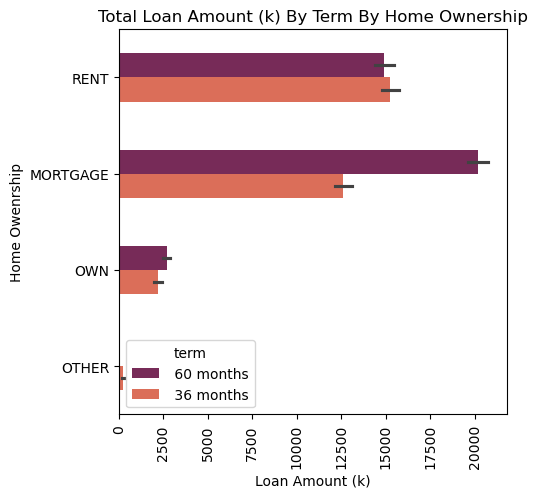

In [136]:
plt.figure(figsize=(5,5))
sns.barplot(
                data=df_charged_off, 
                hue='term', 
                x=df_charged_off['loan_amnt']/1000, 
                y='home_ownership', 
                width=0.5,
                estimator='sum', 
                hue_order = df_charged_off['term'].unique().sort(),
                order = df_temp.index,
                palette='rocket'
            )
plt.title("Total Loan Amount (k) By Term By Home Ownership")
plt.xlabel('Loan Amount (k)')
plt.ylabel("Home Owenrship")
plt.xticks(rotation=90)

## Step 7.6 Total Loan By Loan Term By Employment Length

In [159]:
df_temp = round(df_charged_off['emp_length'].value_counts()/df_charged_off['id'].count() * 100,2)

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.]),
 [Text(0.0, 0, '0'),
  Text(2000.0, 0, '2000'),
  Text(4000.0, 0, '4000'),
  Text(6000.0, 0, '6000'),
  Text(8000.0, 0, '8000'),
  Text(10000.0, 0, '10000'),
  Text(12000.0, 0, '12000'),
  Text(14000.0, 0, '14000')])

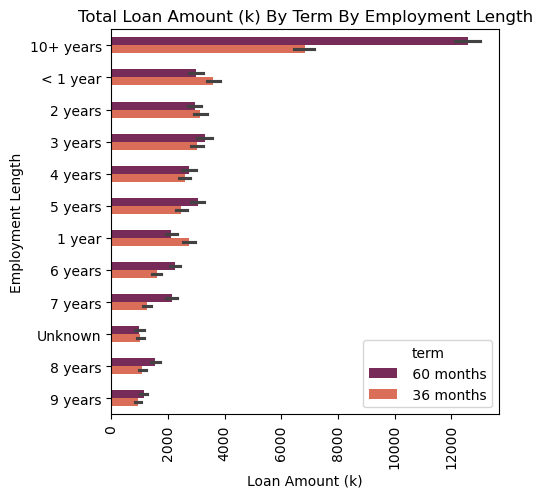

In [161]:
plt.figure(figsize=(5,5))
sns.barplot(
                data=df_charged_off, 
                hue='term',
                x=df_charged_off['loan_amnt']/1000, 
                y='emp_length', 
                width=0.5,
                estimator='sum',
                order = df_temp.index,
                hue_order = df_charged_off['term'].unique().sort(),
                palette='rocket',
                legend=True

            )
plt.title("Total Loan Amount (k) By Term By Employment Length")
plt.xlabel('Loan Amount (k)')
plt.ylabel("Employment Length")
plt.xticks(rotation=90)

## Step 7.7 Total Loan By Loan Term By Monthly Income Bucket

In [162]:
df_temp = round(df_charged_off['monthly_income_bucket'].value_counts()/df_charged_off['id'].count() * 100,2)

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.,
        40000.]),
 [Text(0.0, 0, '0'),
  Text(5000.0, 0, '5000'),
  Text(10000.0, 0, '10000'),
  Text(15000.0, 0, '15000'),
  Text(20000.0, 0, '20000'),
  Text(25000.0, 0, '25000'),
  Text(30000.0, 0, '30000'),
  Text(35000.0, 0, '35000'),
  Text(40000.0, 0, '40000')])

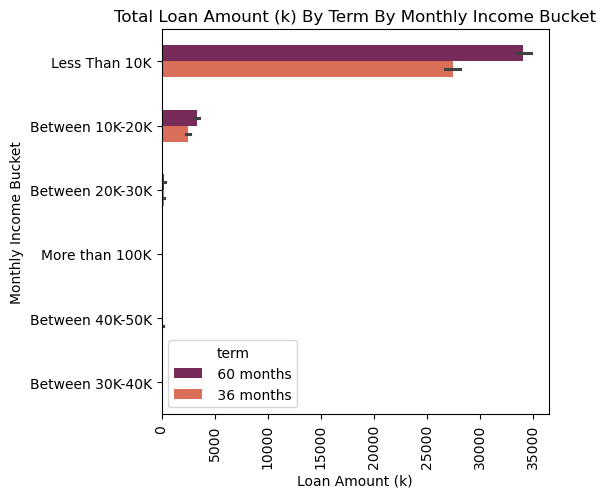

In [164]:
plt.figure(figsize=(5,5))
sns.barplot(
                data=df_charged_off, 
                hue='term',
                x=df_charged_off['loan_amnt']/1000, 
                y='monthly_income_bucket', 
                width=0.5,
                estimator='sum',
                order = df_temp.index,
                hue_order = df_charged_off['term'].unique().sort(),
                palette='rocket',
                legend=True

            )
plt.title("Total Loan Amount (k) By Term By Monthly Income Bucket")
plt.xlabel('Loan Amount (k)')
plt.ylabel("Monthly Income Bucket")
plt.xticks(rotation=90)

# Step 8: Perform Cooreation Analysis Using HeatMaps

## 8.1 Check the heat map for home ownership and loan purpose

In [254]:
df_charged_off_group = df_charged_off.groupby(by=['home_ownership','purpose'])['loan_amnt'].sum()/10000

In [255]:
df_charged_off_group = pd.DataFrame(data=df_charged_off_group)

In [256]:
df_charged_off_group.reset_index(inplace=True)

In [261]:
df_grade_pivot_table = pd.pivot_table(
                                        data=df_charged_off_group,
                                        values= 'loan_amnt',
                                        index = 'home_ownership',
                                        columns = 'purpose',
                                        aggfunc="sum"
)

In [258]:
df_grade_pivot_table.fillna(0,inplace=True)

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'MORTGAGE'),
  Text(0, 1.5, 'OTHER'),
  Text(0, 2.5, 'OWN'),
  Text(0, 3.5, 'RENT')])

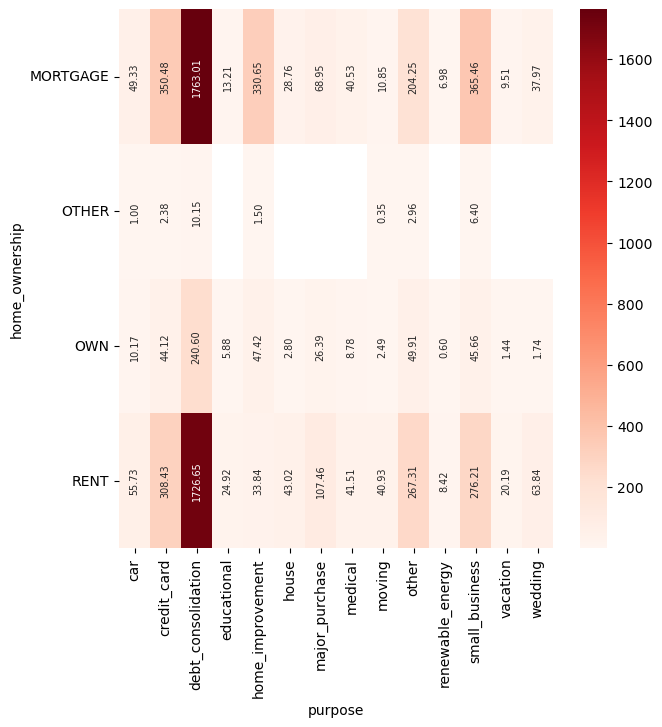

In [263]:
plt.figure(figsize=(7,7))
sns.heatmap(
                data=df_grade_pivot_table, 
                annot=True, 
                cmap='Reds',
                fmt='0.2f',
                annot_kws={"fontsize":7, "rotation": 90}
            )
plt.yticks(rotation=0)


# Conclusion: Appears that loans with sub-grades (B3, B4, B5, C1, C2, C3, D2, D3) are more likely to default

## 8.2 Check the heat map for loan purpose and address state

In [297]:
df_charged_off_group = df_charged_off.groupby(by=['addr_state','purpose'])['loan_amnt'].sum()/10000

In [298]:
df_charged_off_group = pd.DataFrame(data=df_charged_off_group)

In [299]:
df_charged_off_group.reset_index(inplace=True)

In [300]:
df_grade_pivot_table = pd.pivot_table(
                                        data=df_charged_off_group,
                                        values= 'loan_amnt',
                                        index = 'addr_state',
                                        columns = 'purpose',
                                        aggfunc="sum"
)

In [301]:
df_grade_pivot_table.fillna(0,inplace=True)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5, 45.5, 46.5]),
 [Text(0, 0.5, 'AK'),
  Text(0, 1.5, 'AL'),
  Text(0, 2.5, 'AR'),
  Text(0, 3.5, 'AZ'),
  Text(0, 4.5, 'CA'),
  Text(0, 5.5, 'CO'),
  Text(0, 6.5, 'CT'),
  Text(0, 7.5, 'DC'),
  Text(0, 8.5, 'DE'),
  Text(0, 9.5, 'FL'),
  Text(0, 10.5, 'GA'),
  Text(0, 11.5, 'HI'),
  Text(0, 12.5, 'ID'),
  Text(0, 13.5, 'IL'),
  Text(0, 14.5, 'KS'),
  Text(0, 15.5, 'KY'),
  Text(0, 16.5, 'LA'),
  Text(0, 17.5, 'MA'),
  Text(0, 18.5, 'MD'),
  Text(0, 19.5, 'MI'),
  Text(0, 20.5, 'MN'),
  Text(0, 21.5, 'MO'),
  Text(0, 22.5, 'MS'),
  Text(0, 23.5, 'MT'),
  Text(0, 24.5, 'NC'),
  Text(0, 25.5, 'NE'),
  Text(0, 26.5, 'NH'),
  Text(0, 27.5, 'NJ'),
  Text(0, 28.5, 'NM'),
  Text(0, 29.5, 'NV

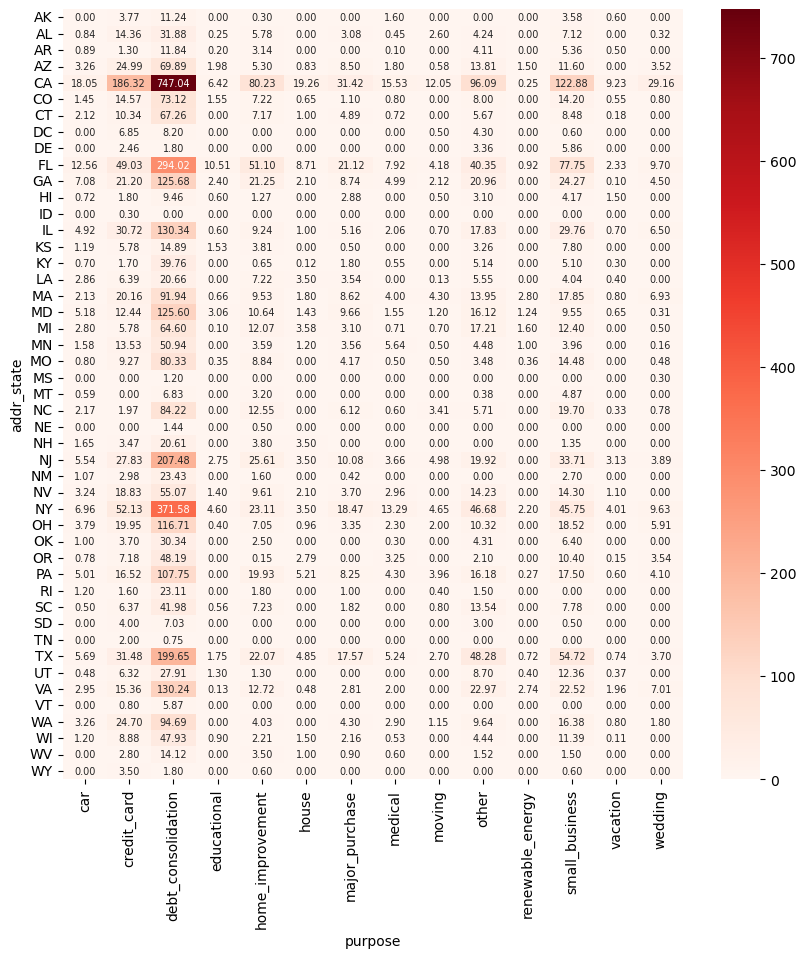

In [302]:
plt.figure(figsize=(10,10))
sns.heatmap(
                data=df_grade_pivot_table, 
                annot=True, 
                cmap='Reds',
                fmt='0.2f',
                annot_kws={"fontsize":7, "rotation": 0}
            )
plt.yticks(rotation=0)

## 8.3 Check the heat map for state and home ownership

In [303]:
df_charged_off_group = df_charged_off.groupby(by=['addr_state','home_ownership'])['loan_amnt'].sum()/10000

In [304]:
df_charged_off_group = pd.DataFrame(data=df_charged_off_group)

In [305]:
df_charged_off_group.reset_index(inplace=True)

In [306]:
df_grade_pivot_table = pd.pivot_table(
                                        data=df_charged_off_group,
                                        values= 'loan_amnt',
                                        index = 'addr_state',
                                        columns = 'home_ownership',
                                        aggfunc="sum"
)

In [307]:
df_grade_pivot_table.fillna(0,inplace=True)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5, 45.5, 46.5]),
 [Text(0, 0.5, 'AK'),
  Text(0, 1.5, 'AL'),
  Text(0, 2.5, 'AR'),
  Text(0, 3.5, 'AZ'),
  Text(0, 4.5, 'CA'),
  Text(0, 5.5, 'CO'),
  Text(0, 6.5, 'CT'),
  Text(0, 7.5, 'DC'),
  Text(0, 8.5, 'DE'),
  Text(0, 9.5, 'FL'),
  Text(0, 10.5, 'GA'),
  Text(0, 11.5, 'HI'),
  Text(0, 12.5, 'ID'),
  Text(0, 13.5, 'IL'),
  Text(0, 14.5, 'KS'),
  Text(0, 15.5, 'KY'),
  Text(0, 16.5, 'LA'),
  Text(0, 17.5, 'MA'),
  Text(0, 18.5, 'MD'),
  Text(0, 19.5, 'MI'),
  Text(0, 20.5, 'MN'),
  Text(0, 21.5, 'MO'),
  Text(0, 22.5, 'MS'),
  Text(0, 23.5, 'MT'),
  Text(0, 24.5, 'NC'),
  Text(0, 25.5, 'NE'),
  Text(0, 26.5, 'NH'),
  Text(0, 27.5, 'NJ'),
  Text(0, 28.5, 'NM'),
  Text(0, 29.5, 'NV

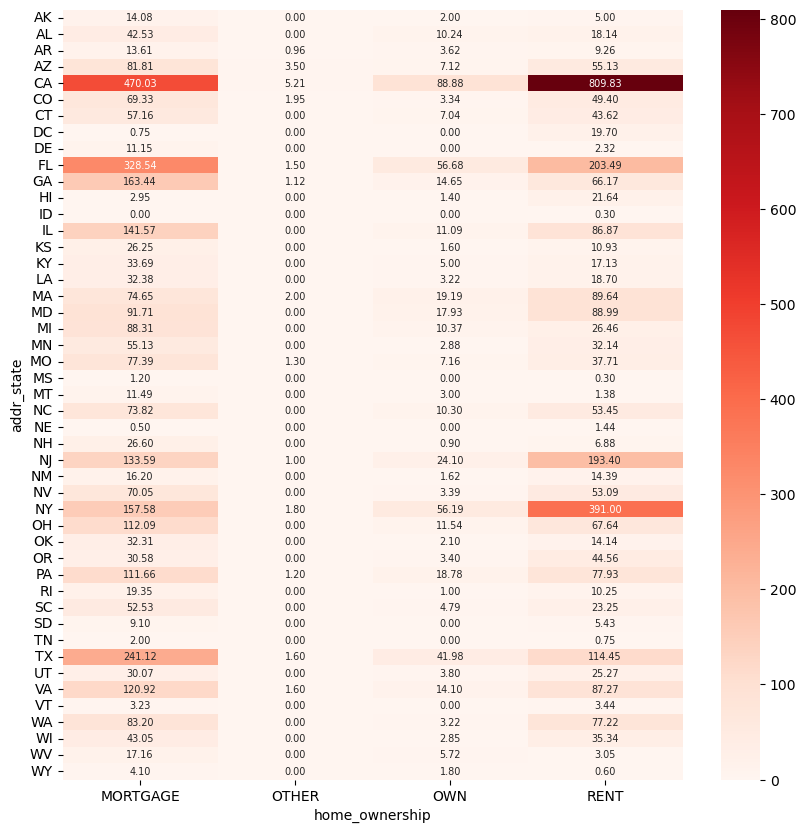

In [308]:
plt.figure(figsize=(10,10))
sns.heatmap(
                data=df_grade_pivot_table, 
                annot=True, 
                cmap='Reds',
                fmt='0.2f',
                annot_kws={"fontsize":7, "rotation": 0}
            )
plt.yticks(rotation=0)

In [283]:
df_charged_off[df_charged_off['loan_amnt'] <= 30000].groupby(by='addr_state')['id'].count().sort_values(ascending=False)

addr_state
CA    1091
FL     492
NY     482
TX     303
NJ     269
GA     208
IL     192
PA     172
VA     168
MA     158
MD     154
OH     149
WA     124
AZ     121
MO     112
NC     111
NV     103
MI     102
CO      91
CT      90
MN      78
OR      71
SC      64
WI      61
LA      51
AL      49
KY      43
OK      40
UT      36
NM      30
KS      29
HI      28
AR      27
RI      25
NH      23
WV      20
AK      15
DC      14
DE      12
SD      12
MT      10
VT       6
NE       3
WY       3
TN       2
MS       2
ID       1
Name: id, dtype: int64

## 8.4 Check the heat map for Home ownership and Employment Length

In [309]:
df_charged_off_group = df_charged_off.groupby(by=['emp_length','home_ownership'])['loan_amnt'].sum()/10000

In [310]:
df_charged_off_group = pd.DataFrame(data=df_charged_off_group)

In [311]:
df_charged_off_group.reset_index(inplace=True)

In [312]:
df_grade_pivot_table = pd.pivot_table(
                                        data=df_charged_off_group,
                                        values= 'loan_amnt',
                                        index = 'emp_length',
                                        columns = 'home_ownership',
                                        aggfunc="sum"
)

In [313]:
df_grade_pivot_table.fillna(0,inplace=True)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, '1 year'),
  Text(0, 1.5, '10+ years'),
  Text(0, 2.5, '2 years'),
  Text(0, 3.5, '3 years'),
  Text(0, 4.5, '4 years'),
  Text(0, 5.5, '5 years'),
  Text(0, 6.5, '6 years'),
  Text(0, 7.5, '7 years'),
  Text(0, 8.5, '8 years'),
  Text(0, 9.5, '9 years'),
  Text(0, 10.5, '< 1 year'),
  Text(0, 11.5, 'Unknown')])

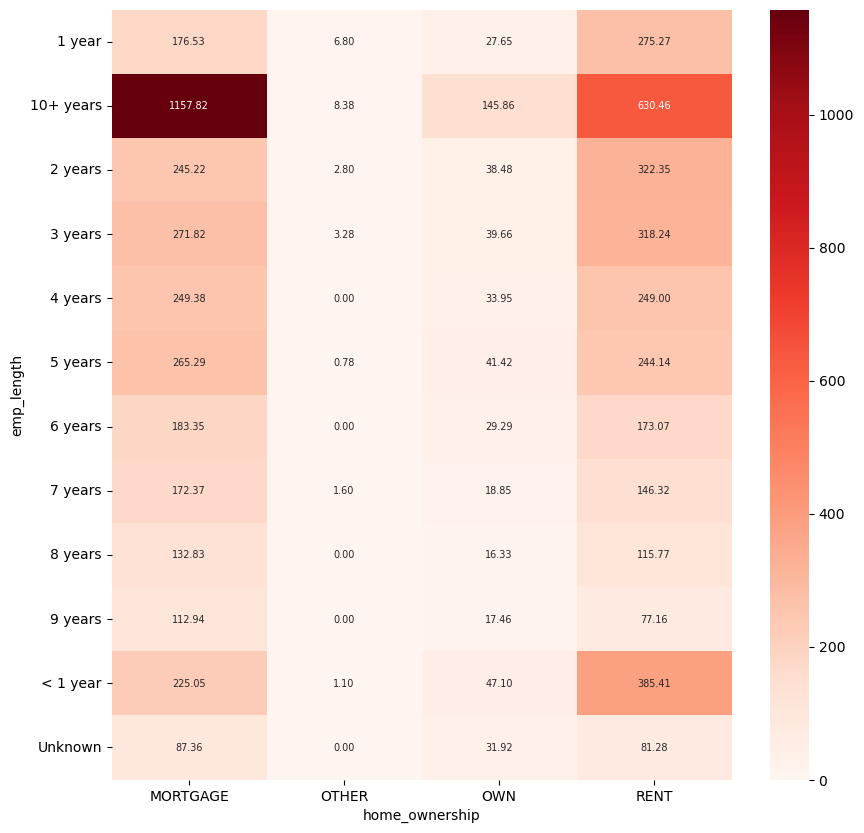

In [314]:
plt.figure(figsize=(10,10))
sns.heatmap(
                data=df_grade_pivot_table, 
                annot=True, 
                cmap='Reds',
                fmt='0.2f',
                annot_kws={"fontsize":7, "rotation": 0}
            )
plt.yticks(rotation=0)

## 8.3 Check the heat map for state and employment length

In [329]:
df_charged_off_group = df_charged_off.groupby(by=['emp_length','addr_state'])['loan_amnt'].sum()/10000

In [316]:
df_charged_off_group = pd.DataFrame(data=df_charged_off_group)

In [317]:
df_charged_off_group.reset_index(inplace=True)

In [318]:
df_grade_pivot_table = pd.pivot_table(
                                        data=df_charged_off_group,
                                        values= 'loan_amnt',
                                        index = 'addr_state',
                                        columns = 'emp_length',
                                        aggfunc="sum"
)

In [319]:
df_grade_pivot_table.fillna(0,inplace=True)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5, 45.5, 46.5]),
 [Text(0, 0.5, 'AK'),
  Text(0, 1.5, 'AL'),
  Text(0, 2.5, 'AR'),
  Text(0, 3.5, 'AZ'),
  Text(0, 4.5, 'CA'),
  Text(0, 5.5, 'CO'),
  Text(0, 6.5, 'CT'),
  Text(0, 7.5, 'DC'),
  Text(0, 8.5, 'DE'),
  Text(0, 9.5, 'FL'),
  Text(0, 10.5, 'GA'),
  Text(0, 11.5, 'HI'),
  Text(0, 12.5, 'ID'),
  Text(0, 13.5, 'IL'),
  Text(0, 14.5, 'KS'),
  Text(0, 15.5, 'KY'),
  Text(0, 16.5, 'LA'),
  Text(0, 17.5, 'MA'),
  Text(0, 18.5, 'MD'),
  Text(0, 19.5, 'MI'),
  Text(0, 20.5, 'MN'),
  Text(0, 21.5, 'MO'),
  Text(0, 22.5, 'MS'),
  Text(0, 23.5, 'MT'),
  Text(0, 24.5, 'NC'),
  Text(0, 25.5, 'NE'),
  Text(0, 26.5, 'NH'),
  Text(0, 27.5, 'NJ'),
  Text(0, 28.5, 'NM'),
  Text(0, 29.5, 'NV

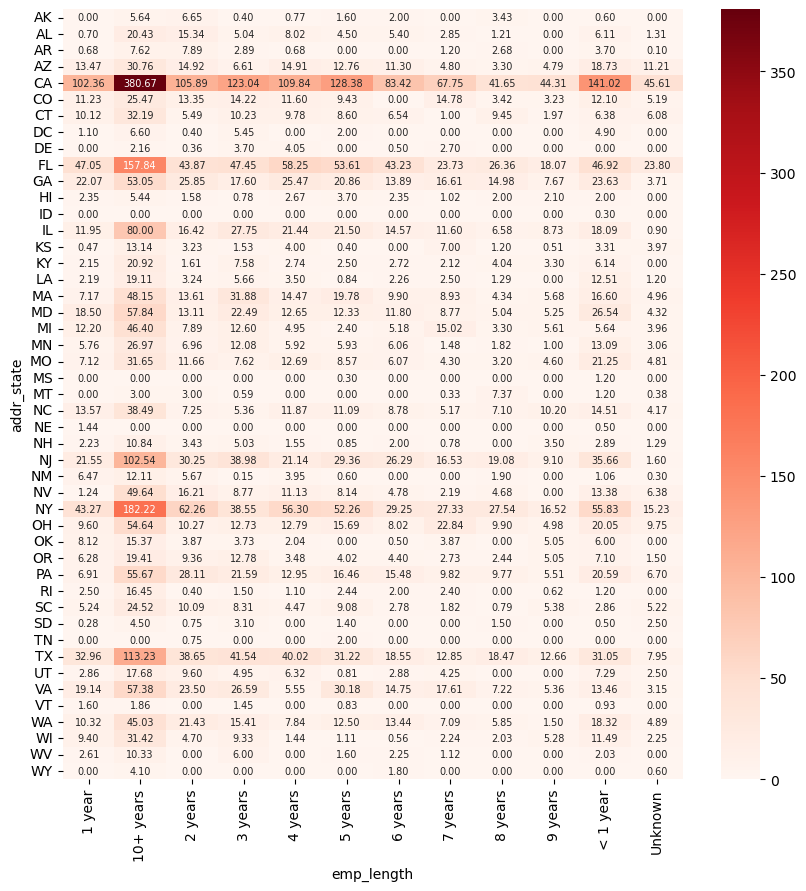

In [320]:
plt.figure(figsize=(10,10))
sns.heatmap(
                data=df_grade_pivot_table, 
                annot=True, 
                cmap='Reds',
                fmt='0.2f',
                annot_kws={"fontsize":7, "rotation": 0}
            )
plt.yticks(rotation=0)